<a href="https://colab.research.google.com/github/shyamprasad1235/Diabetes-Prediction-Using-ML/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Connection with Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd

In [ ]:
!pip install squarify plotly scikit-learn imbalanced-learn --upgrade imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.


In [ ]:
pip install --upgrade scikit-learn


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import missingno as msno
%matplotlib inline
import squarify
from scipy import interp
from contextlib import contextmanager
import time

In [ ]:
# Plotly imports
import plotly.express as ex
import plotly.graph_objects as go
import plotly.offline as py
import plotly.figure_factory as ff
import squarify

In [ ]:
# Scikit-Learn imports
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import (
    RandomizedSearchCV,
    GridSearchCV,
    cross_val_score,
    train_test_split,
    KFold,
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
)
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
import lightgbm as lgbm

from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import randint

# Your timer context manager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

In [ ]:
#for warning
import warnings
warnings.filterwarnings('ignore')

**Load the dataset:**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Healthcare-Diabetes.csv')

**Data Exploration**

In [ ]:
df.shape

(2768, 10)

In [ ]:
len(df)

2768

In [ ]:
df.ndim,df.size

(2, 27680)

In [ ]:
df.head(5)

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.tail(5)

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2763  2764            2       75             64             24       55  29.7   
2764  2765            8      179             72             42      130  32.7   
2765  2766            6       85             78              0        0  31.2   
2766  2767            0      129            110             46      130  67.1   
2767  2768            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
2763                     0.370   33        0  
2764                     0.719   36        1  
2765                     0.382   42        0  
2766                     0.319   26        1  
2767                     0.547   25        0

In [ ]:
print(df.columns)

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
df = df.drop(columns=['Id'])

In [ ]:
df.shape

(2768, 9)

In [ ]:
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.tail(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2763            2       75             64             24       55  29.7   
2764            8      179             72             42      130  32.7   
2765            6       85             78              0        0  31.2   
2766            0      129            110             46      130  67.1   
2767            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
2763                     0.370   33        0  
2764                     0.719   36        1  
2765                     0.382   42        0  
2766                     0.319   26        1  
2767                     0.547   25        0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [ ]:
df.describe().T

count        mean         std     min     25%  \
Pregnancies               2768.0    3.742775    3.323801   0.000   1.000   
Glucose                   2768.0  121.102601   32.036508   0.000  99.000   
BloodPressure             2768.0   69.134393   19.231438   0.000  62.000   
SkinThickness             2768.0   20.824422   16.059596   0.000   0.000   
Insulin                   2768.0   80.127890  112.301933   0.000   0.000   
BMI                       2768.0   32.137392    8.076127   0.000  27.300   
DiabetesPedigreeFunction  2768.0    0.471193    0.325669   0.078   0.244   
Age                       2768.0   33.132225   11.777230  21.000  24.000   
Outcome                   2768.0    0.343931    0.475104   0.000   0.000   

                              50%      75%     max  
Pregnancies                 3.000    6.000   17.00  
Glucose                   117.000  141.000  199.00  
BloodPressure              72.000   80.000  122.00  
SkinThickness              23.000   32.000  110.00  
Insulin                    37.000  130.000  846.00  
BMI                        32.200   36.625   80.60  
DiabetesPedigreeFunction    0.375    0.624    2.42  
Age                        29.000   40.000   81.00  
Outcome                     0.000    1.000    1.00

In [ ]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.122839       0.147253      -0.068673   
Glucose                      0.122839  1.000000       0.142095       0.061023   
BloodPressure                0.147253  0.142095       1.000000       0.201167   
SkinThickness               -0.068673  0.061023       0.201167       1.000000   
Insulin                     -0.075734  0.323445       0.087823       0.445345   
BMI                          0.018761  0.225308       0.281560       0.393494   
DiabetesPedigreeFunction    -0.027731  0.127195       0.048471       0.179830   
Age                          0.540805  0.256958       0.238684      -0.111895   
Outcome                      0.223796  0.460644       0.072900       0.075603   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.075734  0.018761                 -0.027731   
Glucose                   0.323445  0.225308                  0.127195   
BloodPressure             0.087823  0.281560                  0.048471   
SkinThickness             0.445345  0.393494                  0.179830   
Insulin                   1.000000  0.215926                  0.190500   
BMI                       0.215926  1.000000                  0.129766   
DiabetesPedigreeFunction  0.190500  0.129766                  1.000000   
Age                      -0.073458  0.038175                  0.028544   
Outcome                   0.123646  0.280928                  0.160664   

                               Age   Outcome  
Pregnancies               0.540805  0.223796  
Glucose                   0.256958  0.460644  
BloodPressure             0.238684  0.072900  
SkinThickness            -0.111895  0.075603  
Insulin                  -0.073458  0.123646  
BMI                       0.038175  0.280928  
DiabetesPedigreeFunction  0.028544  0.160664  
Age                       1.000000  0.237050  
Outcome                   0.237050  1.000000

In [ ]:
df["Outcome"].value_counts()

0    1816
1     952
Name: Outcome, dtype: int64

In [ ]:
# Extract the features (x) and target variable (y)
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your data is in X and labels/targets are in y

# Split the data into 70% training, 20% test, and 10% validation
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

# Split the temporary data into 20% test and 10% validation
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=1/3, random_state=42)

# Now you have X_train, y_train for training (70%)
# X_test, y_test for testing (20%)
# X_val, y_val for validation (10%)

In [ ]:
(len(x_train),len(x_test), len(x_val))

(1937, 554, 277)

**Feature Scaling**

In [ ]:
# Standardize the features using the mean and standard deviation from the training data
sc = StandardScaler()

# Fit and transform the training data
x_train = sc.fit_transform(x_train)

# Transform the test data using the same scaling parameters
x_test = sc.transform(x_test)

# Transform the validation data using the same scaling parameters
x_val = sc.transform(x_val)


**Pre-Processing**

**Find the Missing value**

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False)!=0]

percent = ((df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)[(df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) !=0]) * 100

missing = pd.concat([total, percent],axis=1, keys=['Total', 'percent'])

missing['percent'] = missing['percent'].apply(lambda x: "%.2f%%"%x)

print(missing)

Empty DataFrame
Columns: [Total, percent]
Index: []


**1. Imputation**

In [ ]:
import pandas as pd

# Find columns with values equal to 0
columns_with_zeros = (df == 0).sum()

# Print the column names and count of 0 values in each column
print("Columns with values equal to 0:")
for column, count in columns_with_zeros.items():
    print(f"Column '{column}' has {count} occurrences of 0.")


Columns with values equal to 0:
Column 'Pregnancies' has 412 occurrences of 0.
Column 'Glucose' has 18 occurrences of 0.
Column 'BloodPressure' has 125 occurrences of 0.
Column 'SkinThickness' has 800 occurrences of 0.
Column 'Insulin' has 1330 occurrences of 0.
Column 'BMI' has 39 occurrences of 0.
Column 'DiabetesPedigreeFunction' has 0 occurrences of 0.
Column 'Age' has 0 occurrences of 0.
Column 'Outcome' has 1816 occurrences of 0.


In [ ]:
import pandas as pd
import numpy as np

# Specify the columns for which you want to perform imputation
columns_to_impute = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace 0 values with NaN in the specified columns
df[columns_to_impute] = df[columns_to_impute].replace(0, np.nan)

# Calculate the median for each column
column_medians = df[columns_to_impute].median()

# Fill missing values in each column with the median of that column
df[columns_to_impute] = df[columns_to_impute].fillna(column_medians)

# Now, the specified columns have missing values imputed with their respective column medians


In [ ]:
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    126.0  33.6   
1            1     85.0           66.0           29.0    126.0  26.6   
2            8    183.0           64.0           29.0    126.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

**2. SMOTE**

In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'df' with a target variable 'Outcome'
target_variable = 'Outcome'

# Calculate the class distribution
class_distribution = df[target_variable].value_counts()

# Find the minority class
minority_class = class_distribution.idxmin()
minority_count = class_distribution.min()

# Print the results
print(f"Minority Class: {minority_class}, Count: {minority_count}")


Minority Class: 1, Count: 952


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming you have a DataFrame 'df' with a target variable 'Outcome'
# Replace 'Outcome' with your actual target variable name

# Step 1: Initialize and apply SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(df.drop('Outcome', axis=1), df['Outcome'])

# Step 2: Count the new data points inserted
new_data_count = len(x_resampled) - len(df)

# Step 3: Count the total data points in the minority class after SMOTE
minority_class_count_after_smote = (y_resampled == 1).sum()

# Step 4: Print the results
print(f"New data points inserted after SMOTE: {new_data_count}")
print(f"Total data points in the minority class after SMOTE: {minority_class_count_after_smote}")

New data points inserted after SMOTE: 864
Total data points in the minority class after SMOTE: 1816


**Bar Chart:**

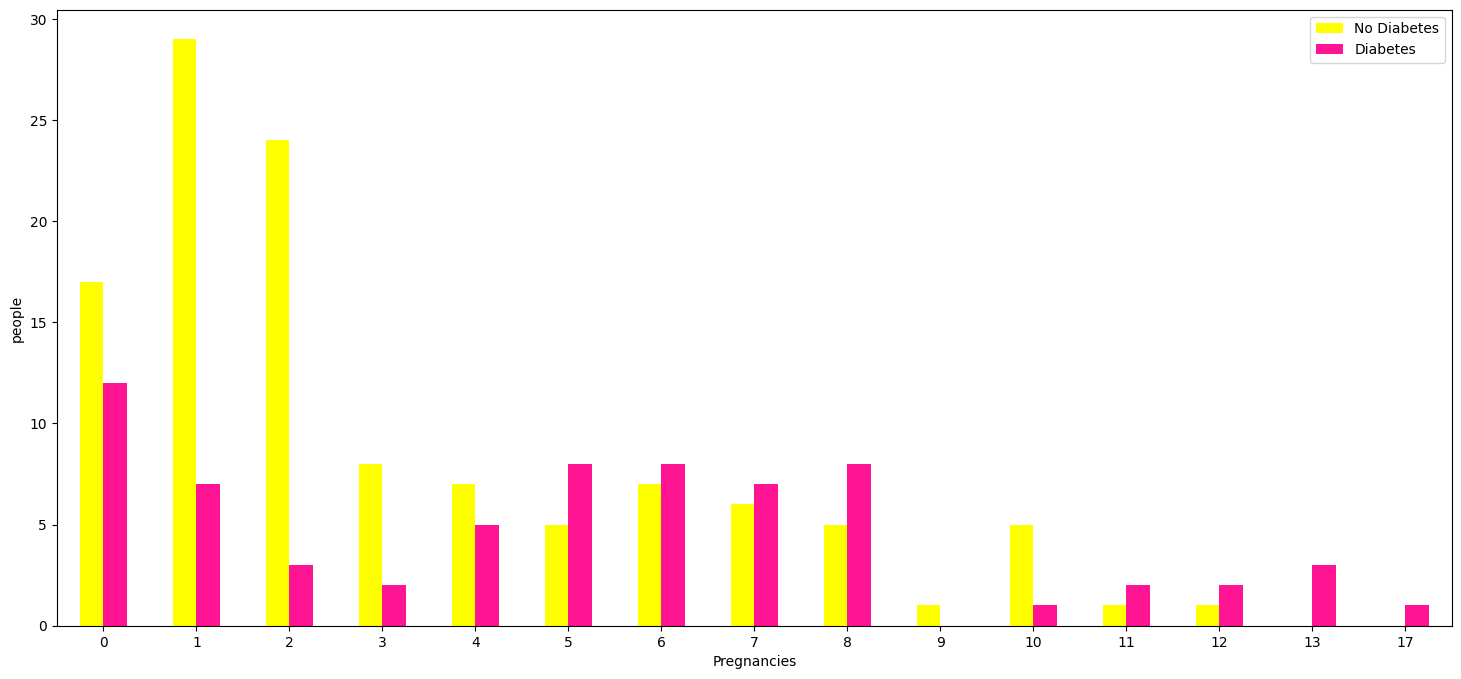

In [ ]:
# Comparing Pregnancies with the Outcome
pd.crosstab(df.Pregnancies[::15],df.Outcome).plot(kind="bar",figsize=(18,8),color=["yellow","deeppink"])
plt.ylabel("people");
plt.xticks(rotation=0);
plt.legend(['No Diabetes','Diabetes']);

**kernel density estimate (KDE) plot**

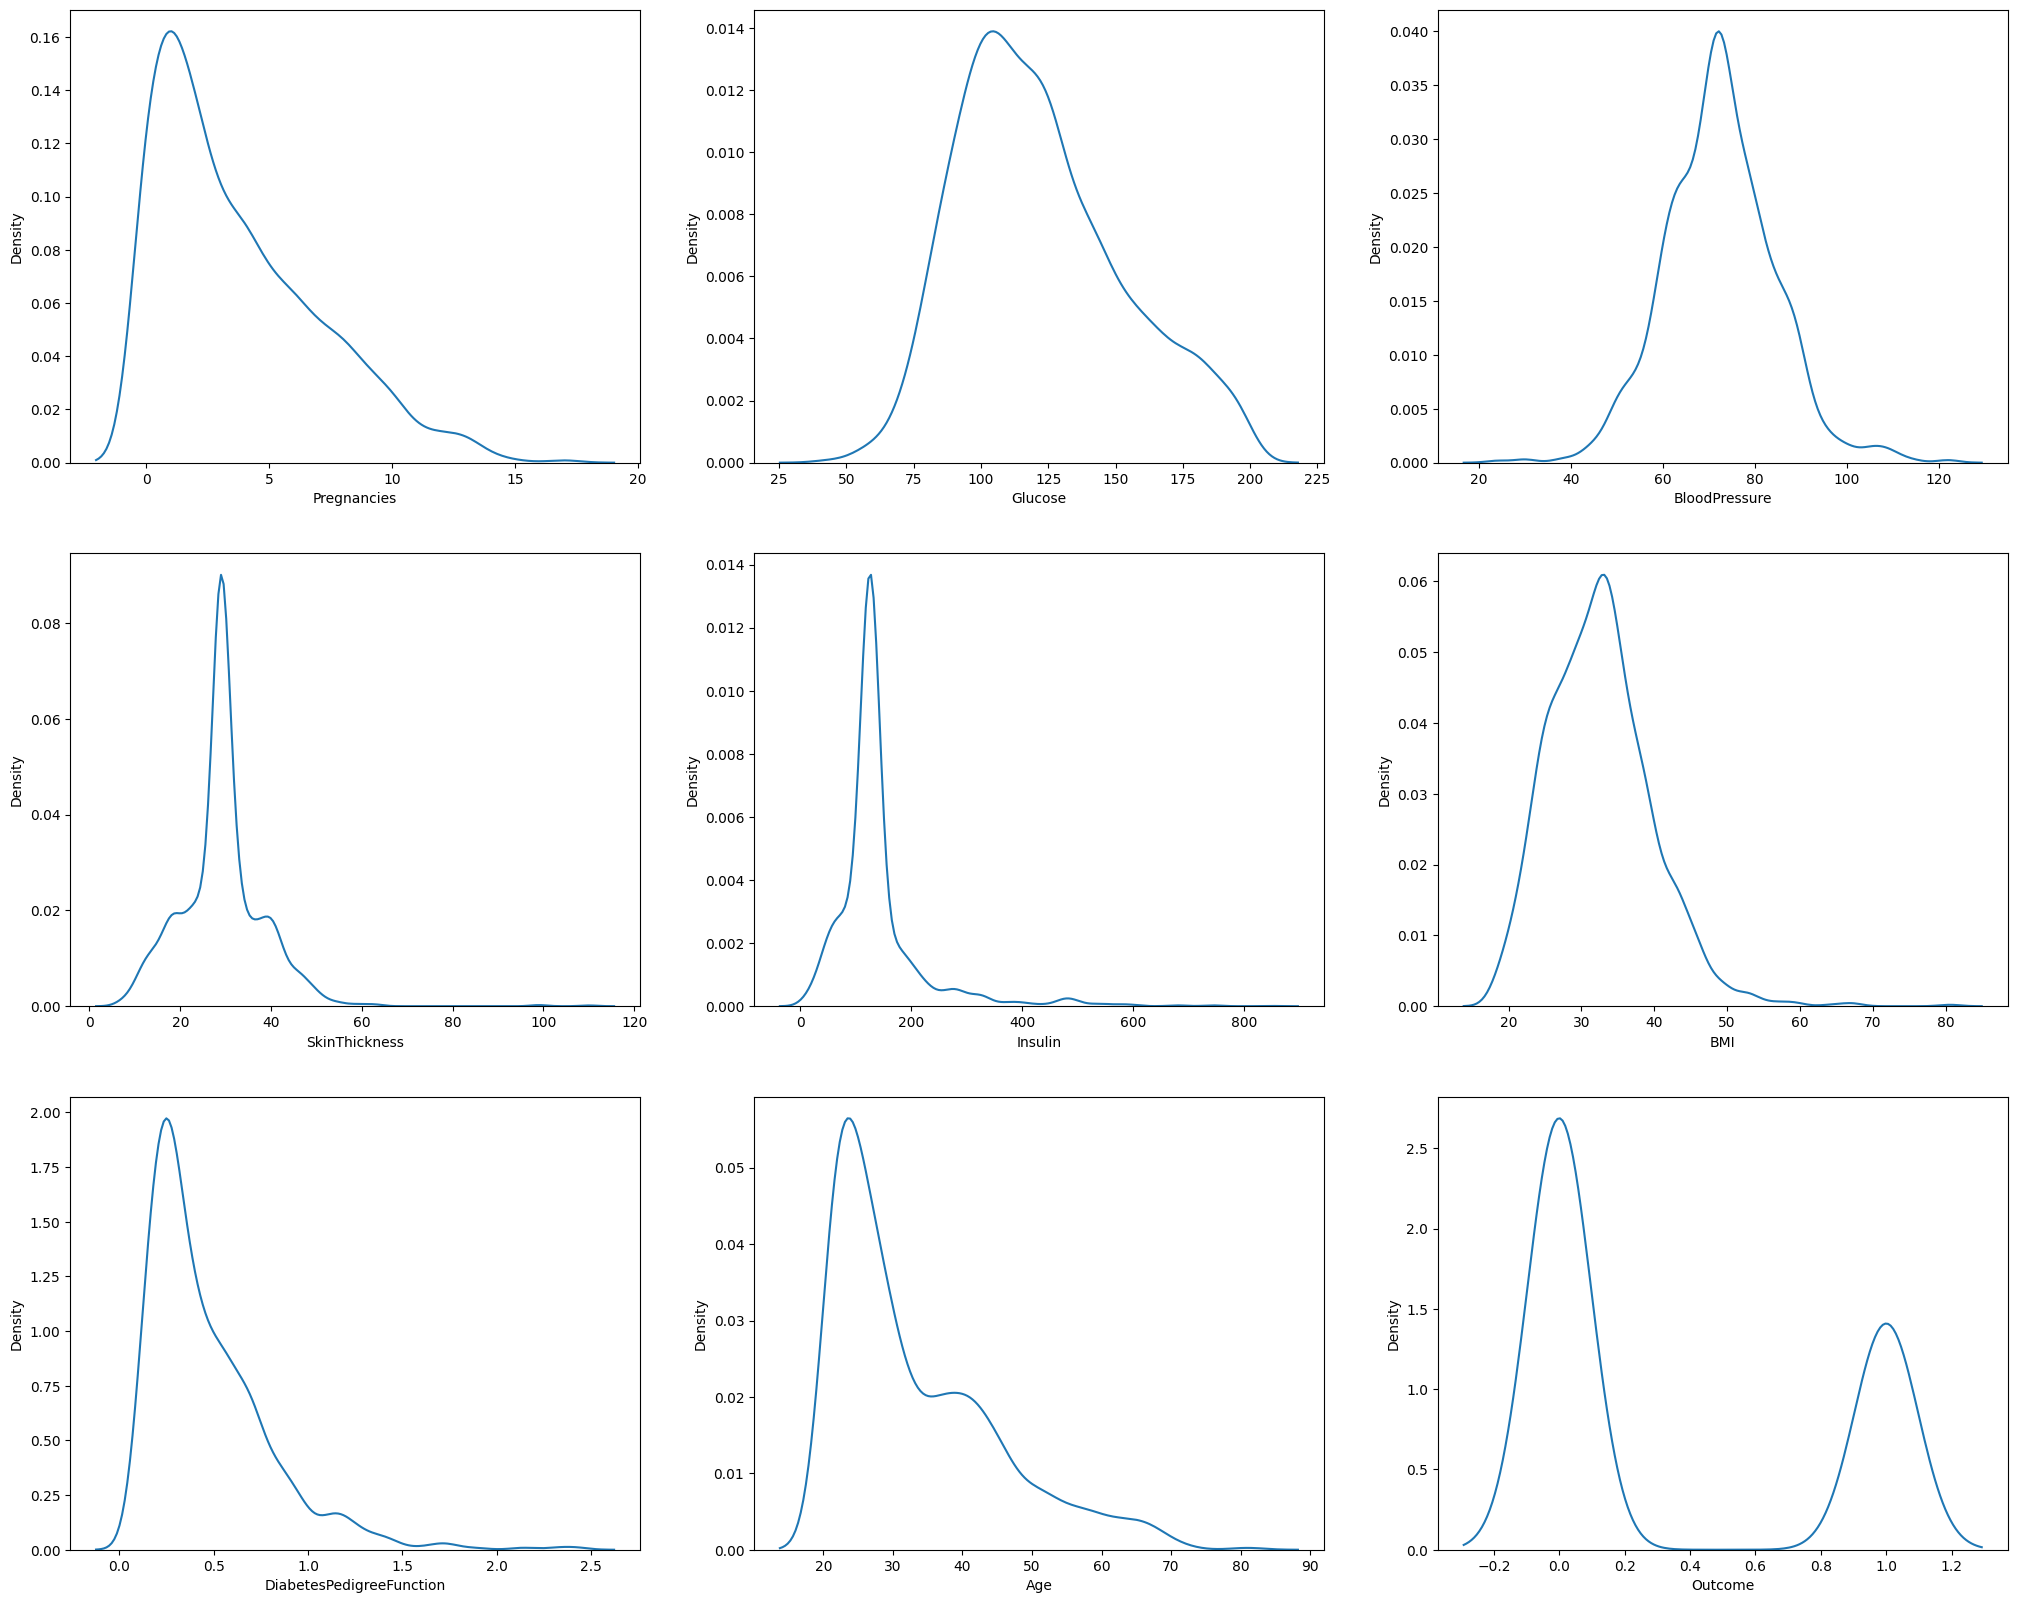

In [ ]:
plt.figure(figsize=(25, 20))
i = 1
for col in df.columns:
    if i <= 9:  # Limit the number of subplots to 3x3
        plt.subplot(3, 3, i)
        sns.kdeplot(df[col])
        i += 1
    else:
        break  # Break the loop if we've reached 9 subplots


**Q-Q (quantile-quantile) plot**

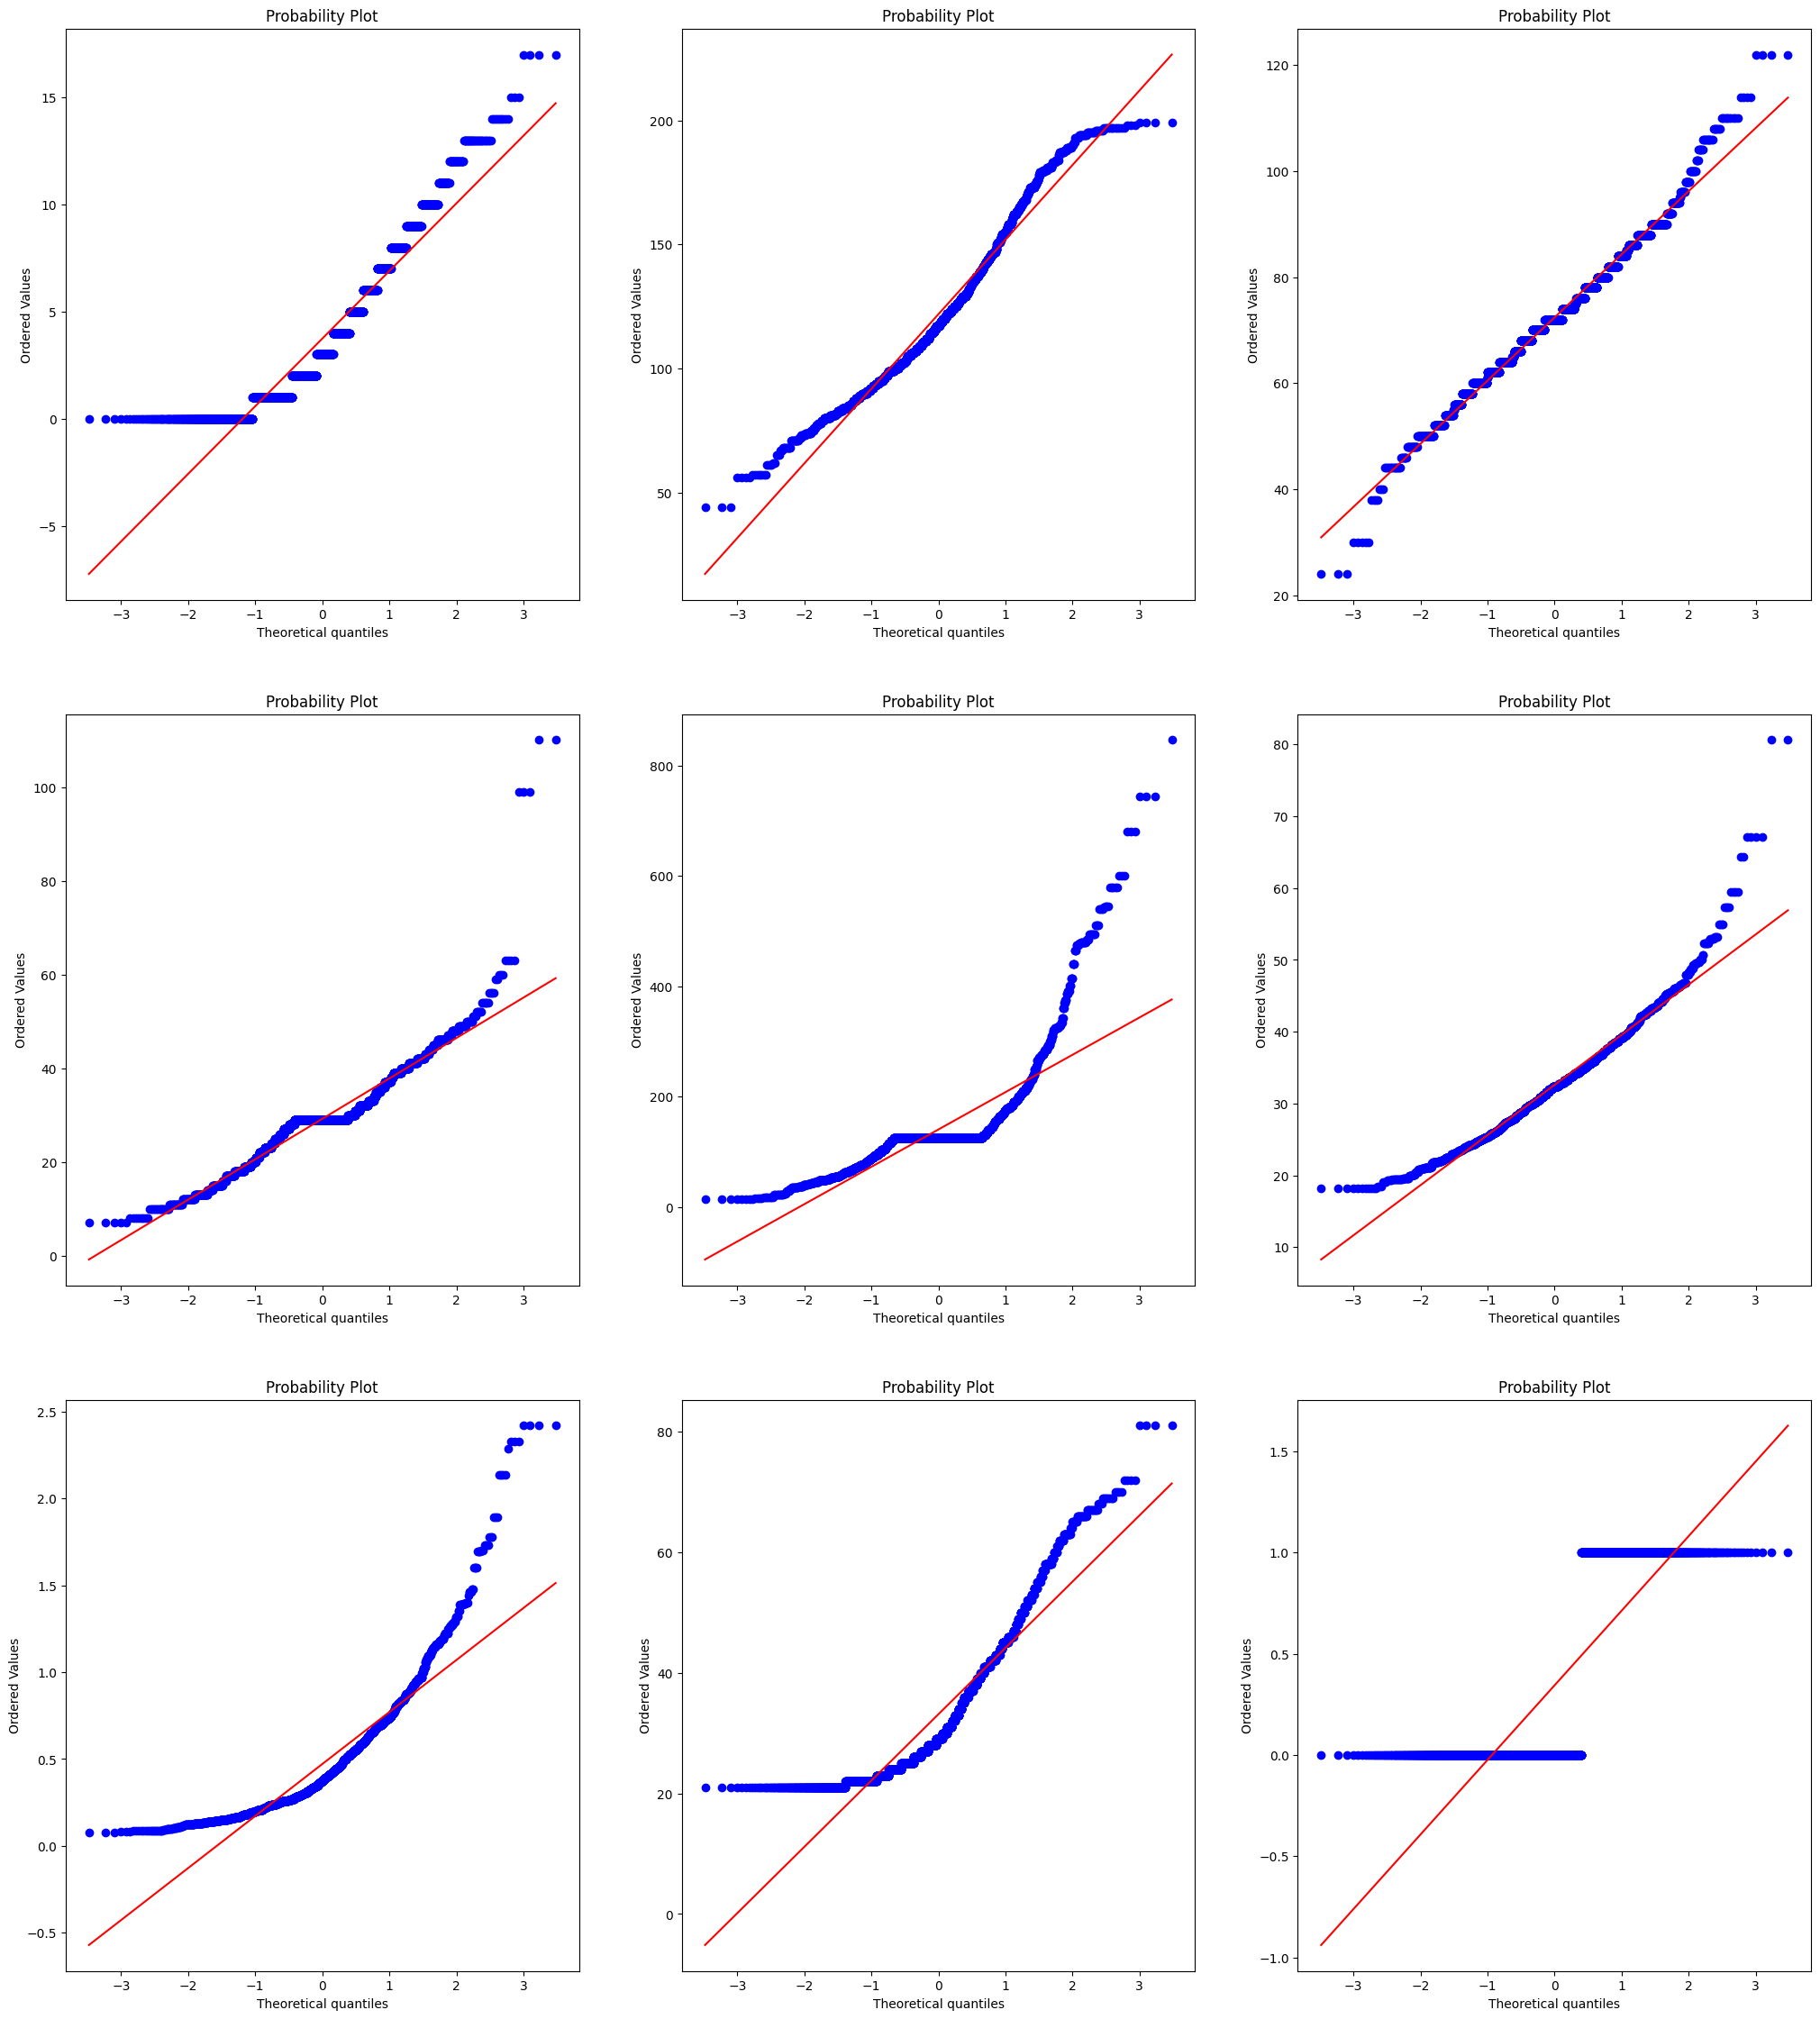

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

plt.figure(figsize=(25, 28))
i = 1
for col in df.columns:
    if i <= 9:  # Limit the number of subplots to 3x3
        plt.subplot(3, 3, i)
        stats.probplot(df[col], dist='norm', plot=plt)
        i += 1
    else:
        break  # Break the loop if we've reached 9 subplots

plt.show()


**Scatter plot**

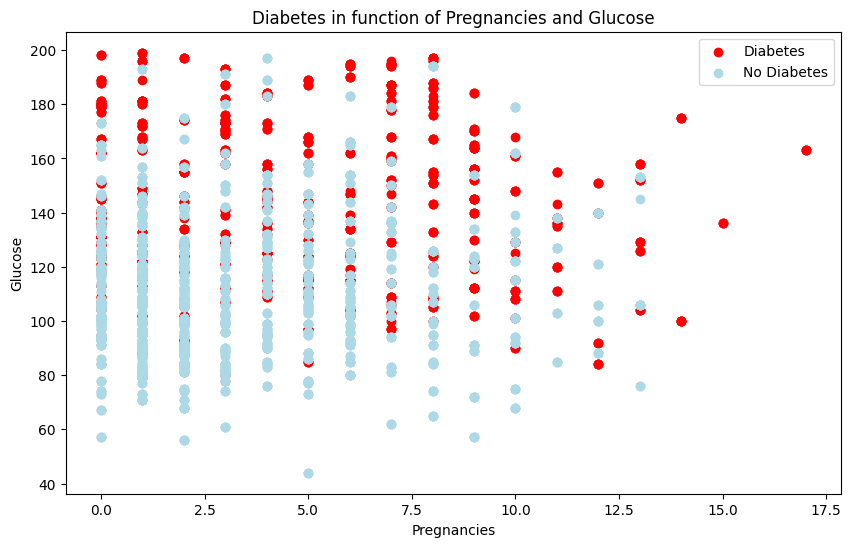

In [ ]:
#finding out the pregnancies and Gulcose who have Diabetes
plt.figure(figsize=(10, 6))

# Scatter with positive example (Diabetes)
plt.scatter(df.Pregnancies[df.Outcome == 1], df.Glucose[df.Outcome == 1], c="red")

# Scatter with negative example (No Diabetes)
plt.scatter(df.Pregnancies[df.Outcome == 0], df.Glucose[df.Outcome == 0], c="lightblue")

# Add some helpful info
plt.title("Diabetes in function of Pregnancies and Glucose")
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.legend(["Diabetes", "No Diabetes"])

plt.show()


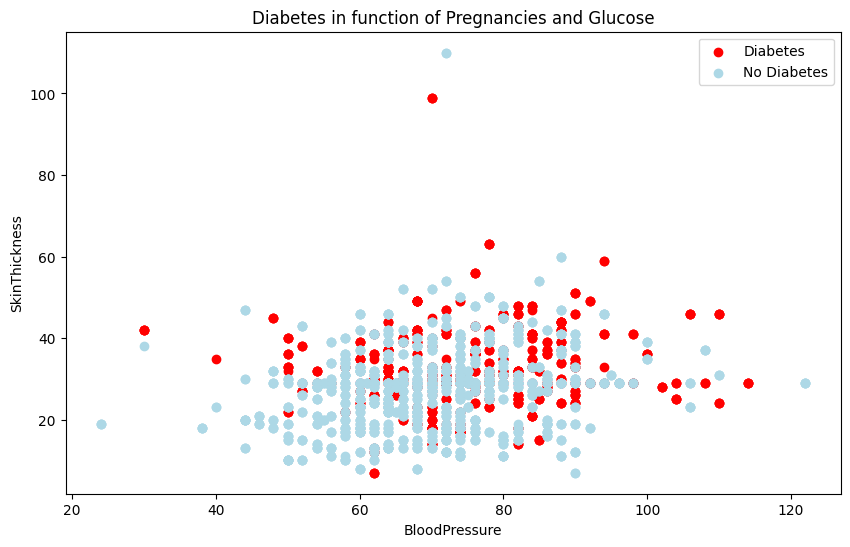

In [ ]:
#finding out the BloodPressure and SkinThickness who have Diabetes
plt.figure(figsize=(10, 6))

# Scatter with positive example (Diabetes)
plt.scatter(df.BloodPressure[df.Outcome == 1], df.SkinThickness[df.Outcome == 1], c="red")

# Scatter with negative example (No Diabetes)
plt.scatter(df.BloodPressure[df.Outcome == 0], df.SkinThickness[df.Outcome == 0], c="lightblue")

# Add some helpful info
plt.title("Diabetes in function of Pregnancies and Glucose")
plt.xlabel("BloodPressure")
plt.ylabel("SkinThickness")
plt.legend(["Diabetes", "No Diabetes"])

plt.show()


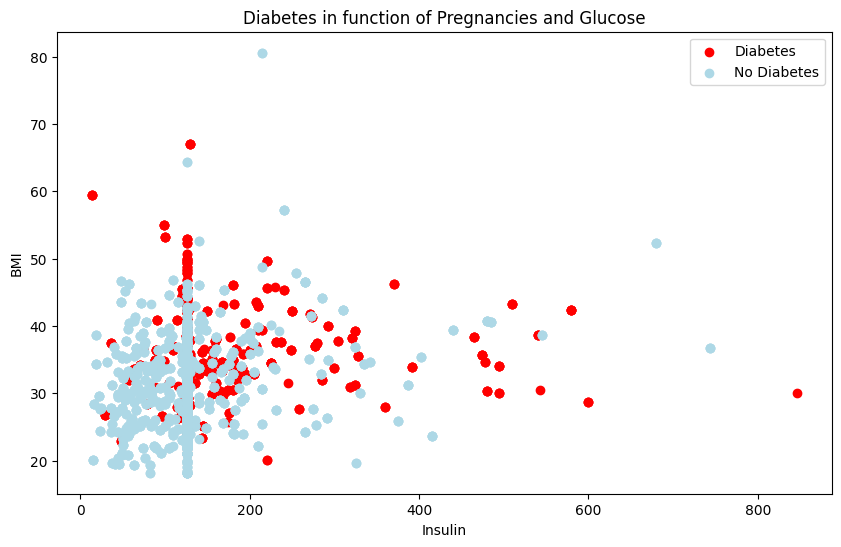

In [ ]:
#finding out the Insulin and BMI who have Diabetes
plt.figure(figsize=(10, 6))

# Scatter with positive example (Diabetes)
plt.scatter(df.Insulin[df.Outcome == 1], df.BMI[df.Outcome == 1], c="red")

# Scatter with negative example (No Diabetes)
plt.scatter(df.Insulin [df.Outcome == 0], df.BMI[df.Outcome == 0], c="lightblue")

# Add some helpful info
plt.title("Diabetes in function of Pregnancies and Glucose")
plt.xlabel("Insulin")
plt.ylabel("BMI")
plt.legend(["Diabetes", "No Diabetes"])

plt.show()


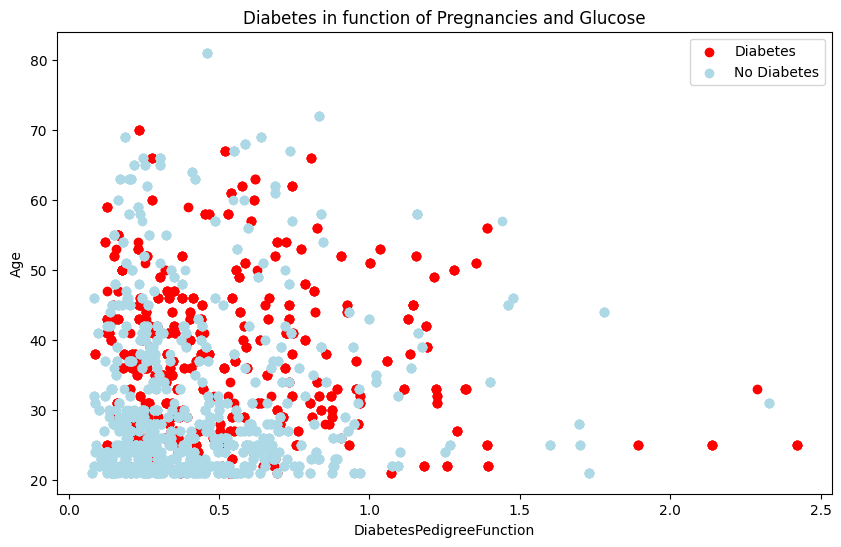

In [ ]:
#finding out the DiabetesPedigreeFunction and Age who have Diabetes
plt.figure(figsize=(10, 6))

# Scatter with positive example (Diabetes)
plt.scatter(df.DiabetesPedigreeFunction[df.Outcome == 1], df.Age[df.Outcome == 1], c="red")

# Scatter with negative example (No Diabetes)
plt.scatter(df.DiabetesPedigreeFunction[df.Outcome == 0], df.Age[df.Outcome == 0], c="lightblue")

# Add some helpful info
plt.title("Diabetes in function of Pregnancies and Glucose")
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Age")
plt.legend(["Diabetes", "No Diabetes"])

plt.show()


**HeatMap: Correlation Matrix**

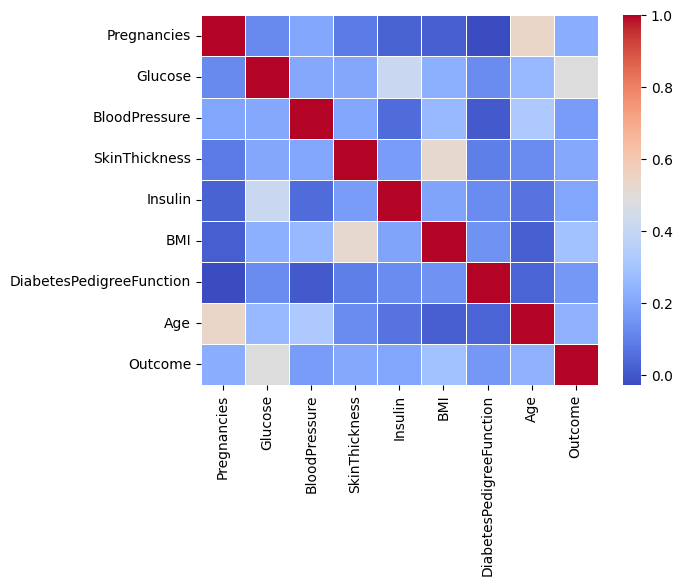

In [ ]:
corr = df.corr()
plt.figure()
sns.heatmap(corr,fmt='.5f', linewidths=.5, cmap="coolwarm")
plt.show()

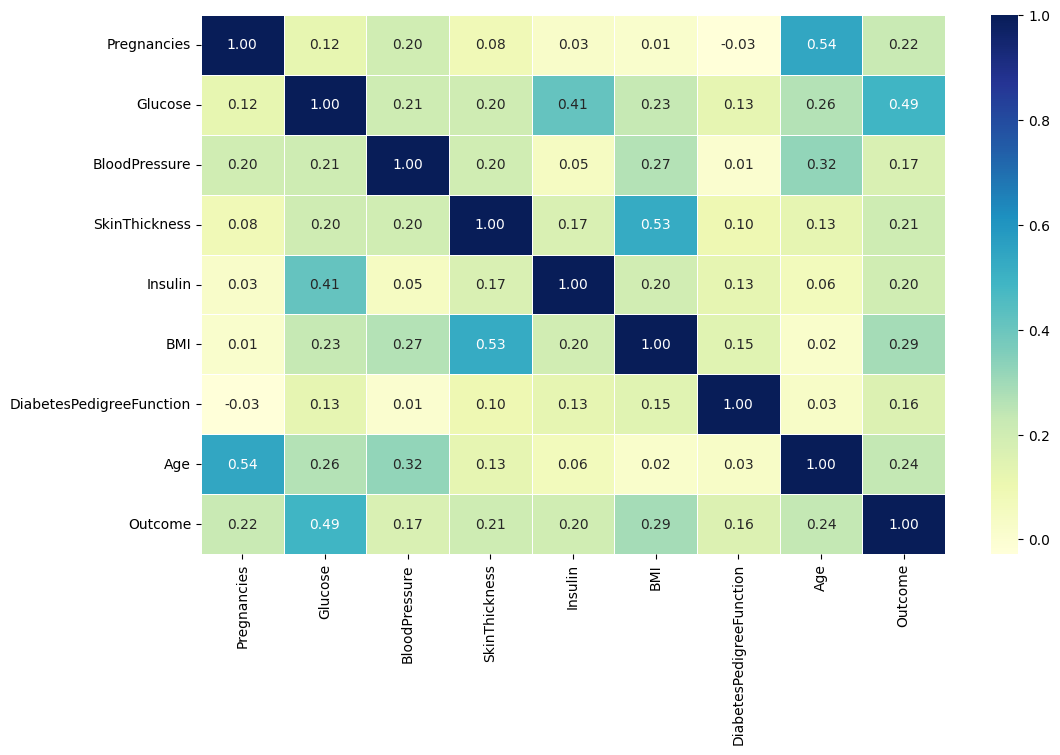

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt=".2f", cmap="YlGnBu")
plt.show()


**Histogram**

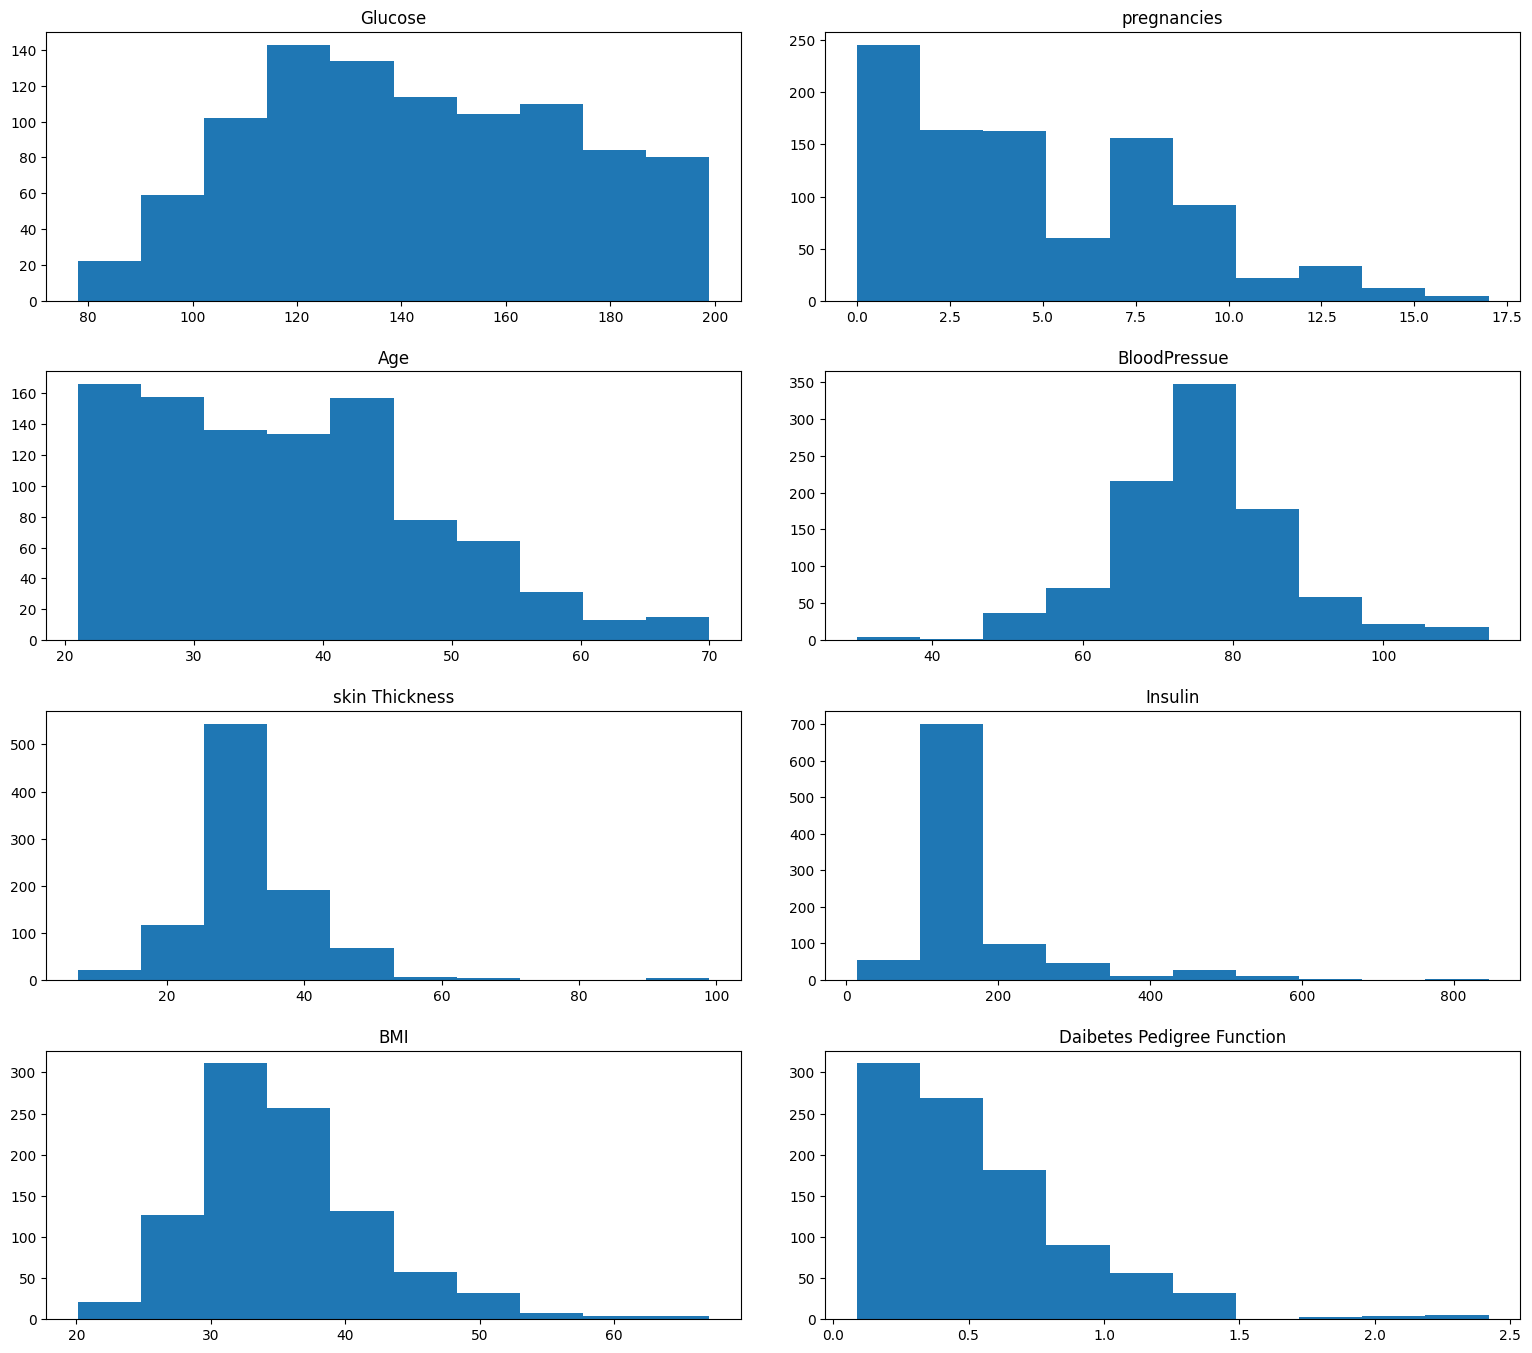

In [ ]:
#Histogram of all coloumns when the Outcome is 1(Diabetes)
fig, ax = plt.subplots(nrows=4,ncols=2,figsize=(16,14))
fig.tight_layout(pad=3.0)
ax[0,0].set_title("Glucose")
ax[0,0].hist(df.Glucose[df.Outcome==1]);
ax[0,1].set_title("pregnancies")
ax[0,1].hist(df.Pregnancies[df.Outcome==1]);
ax[1,0].set_title("Age")
ax[1,0].hist(df.Age[df.Outcome==1]);
ax[1,1].set_title("BloodPressue")
ax[1,1].hist(df.BloodPressure[df.Outcome==1]);
ax[2,0].set_title("skin Thickness")
ax[2,0].hist(df.SkinThickness[df.Outcome==1]);
ax[2,1].set_title("Insulin")
ax[2,1].hist(df.Insulin[df.Outcome==1]);
ax[3,0].set_title("BMI")
ax[3,0].hist(df.BMI[df.Outcome==1]);
ax[3,1].set_title("Daibetes Pedigree Function")
ax[3,1].hist(df.DiabetesPedigreeFunction[df.Outcome==1]);

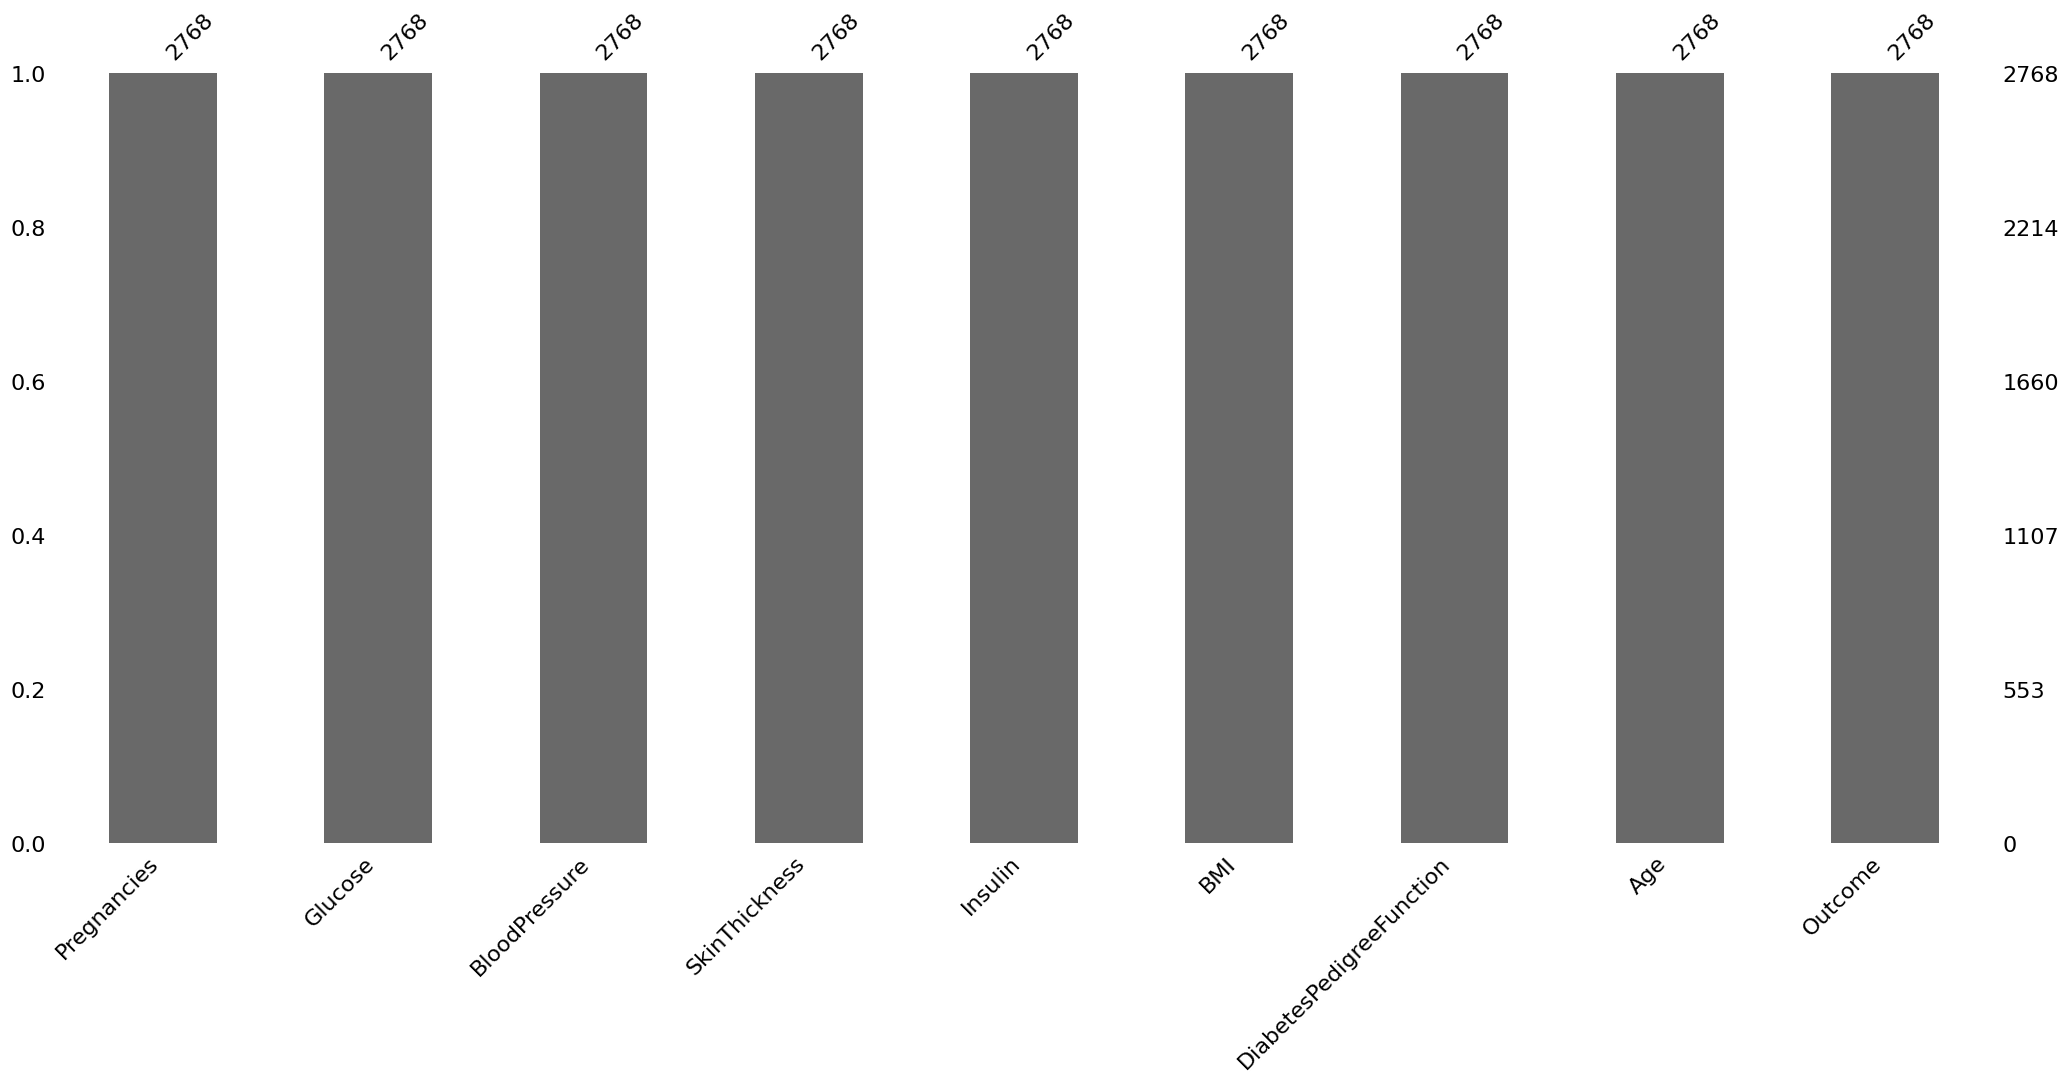

In [ ]:
p=msno.bar(df)

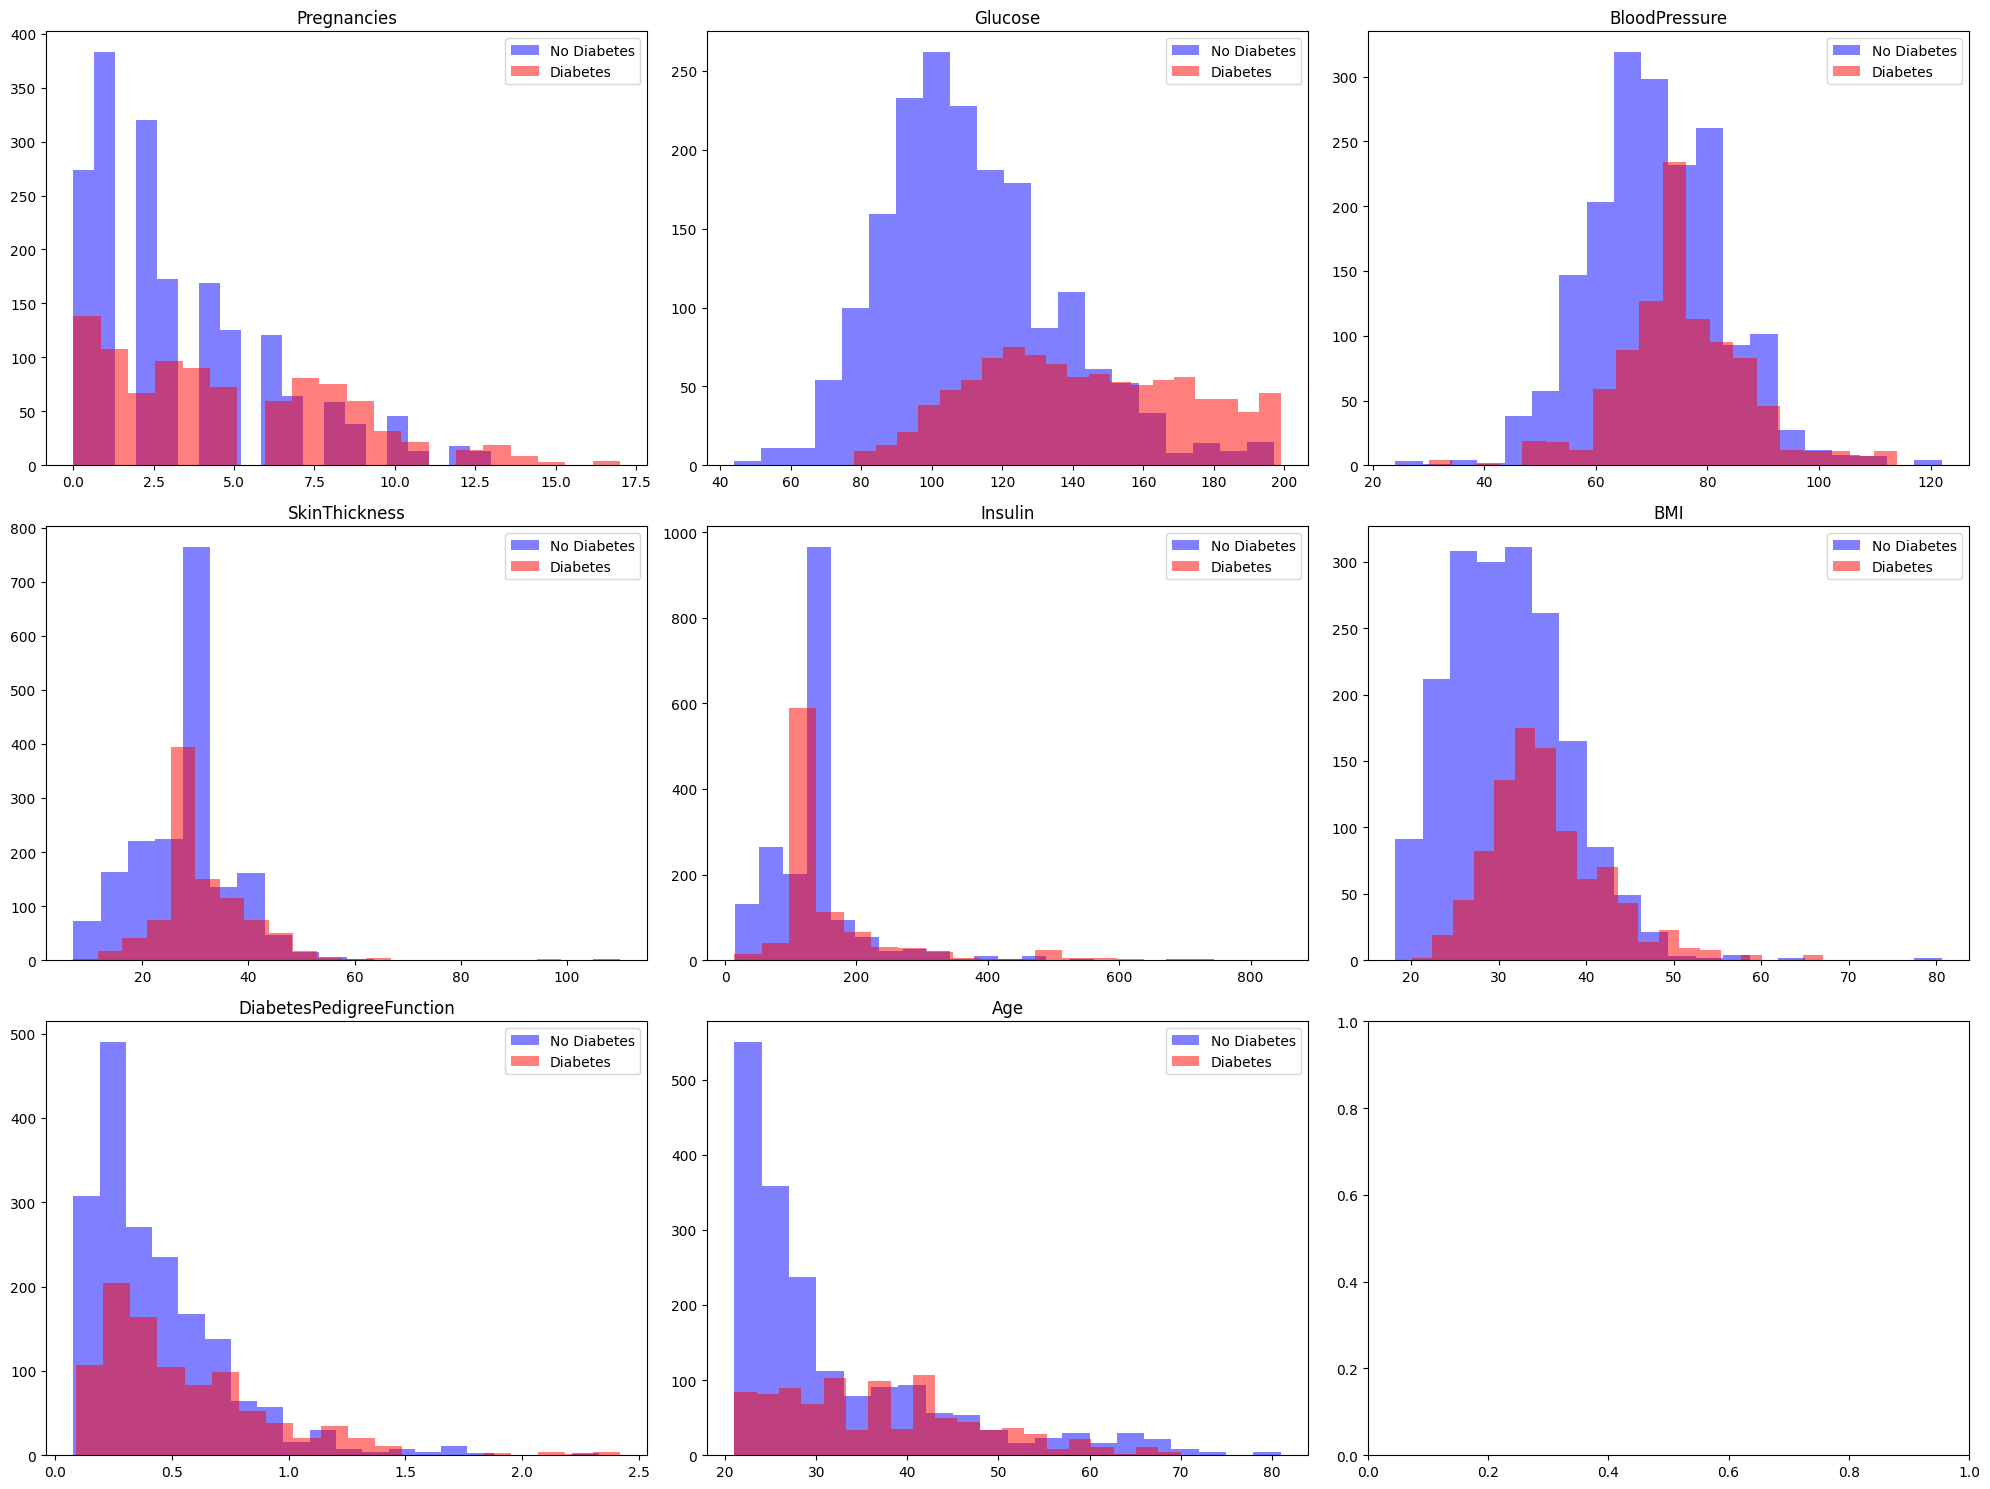

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Features to plot (excluding 'Outcome' which is the target variable)
features = df.columns[:-1]

# Plot histograms for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    ax.hist(df[df['Outcome'] == 0][feature], alpha=0.5, label='No Diabetes', color='blue', bins=20)
    ax.hist(df[df['Outcome'] == 1][feature], alpha=0.5, label='Diabetes', color='red', bins=20)
    ax.set_title(feature)
    ax.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

**Bar Plot**

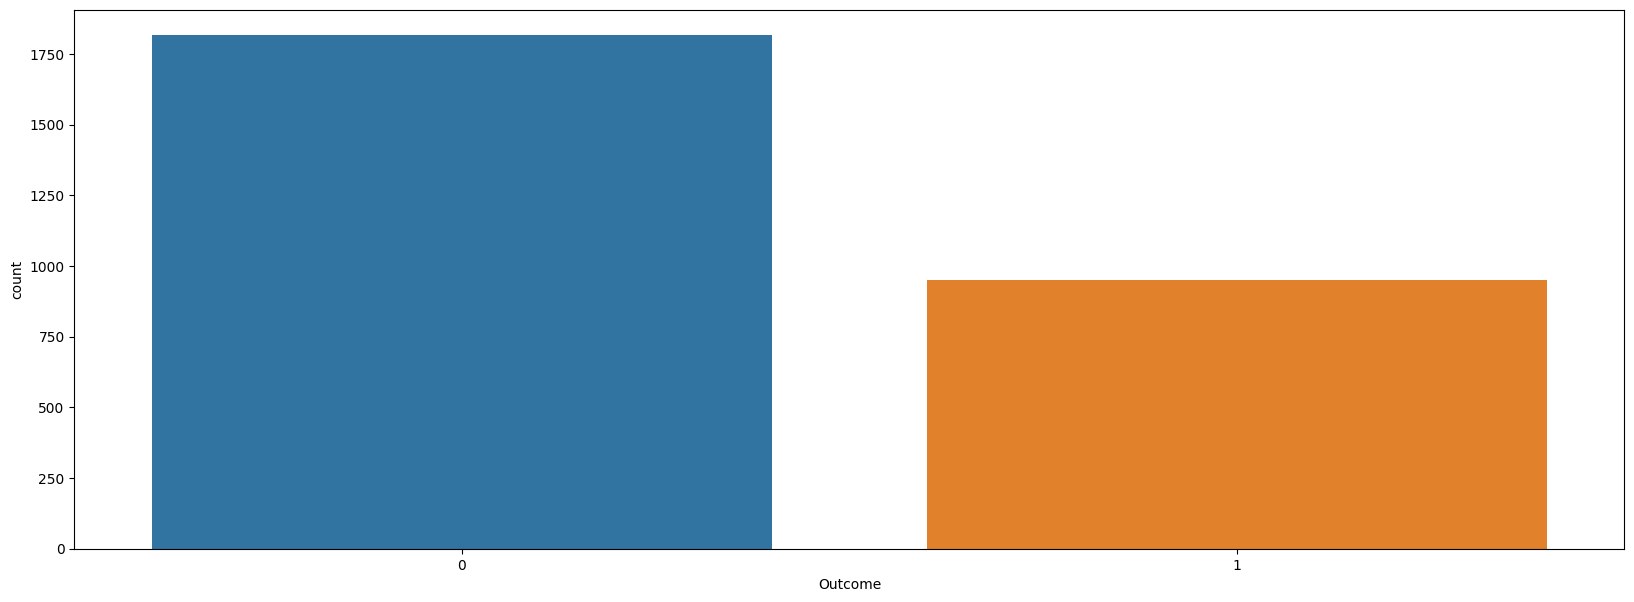

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))

# Create a count plot (bar plot) for the "Outcome" variable
sns.countplot(data=df, x="Outcome", ax=ax)

plt.show()


**Pie Chart**

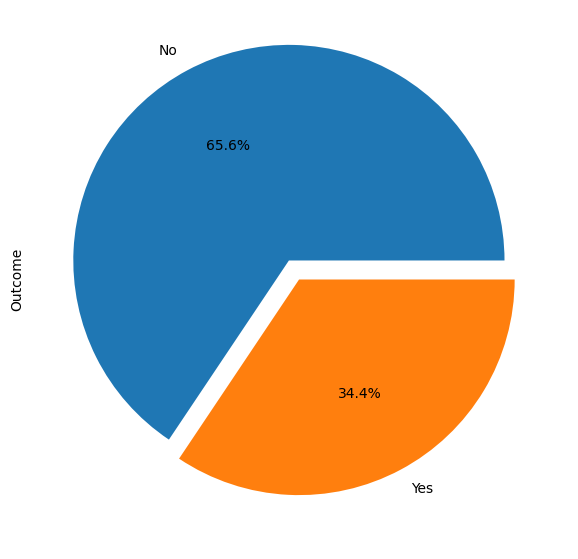

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))

# Create a pie chart for the "Outcome" variable
df["Outcome"].value_counts().plot.pie(explode=[0.1, 0], autopct="%1.1f%%", labels=["No", "Yes"], ax=ax)

plt.show()


**Pair plot:**

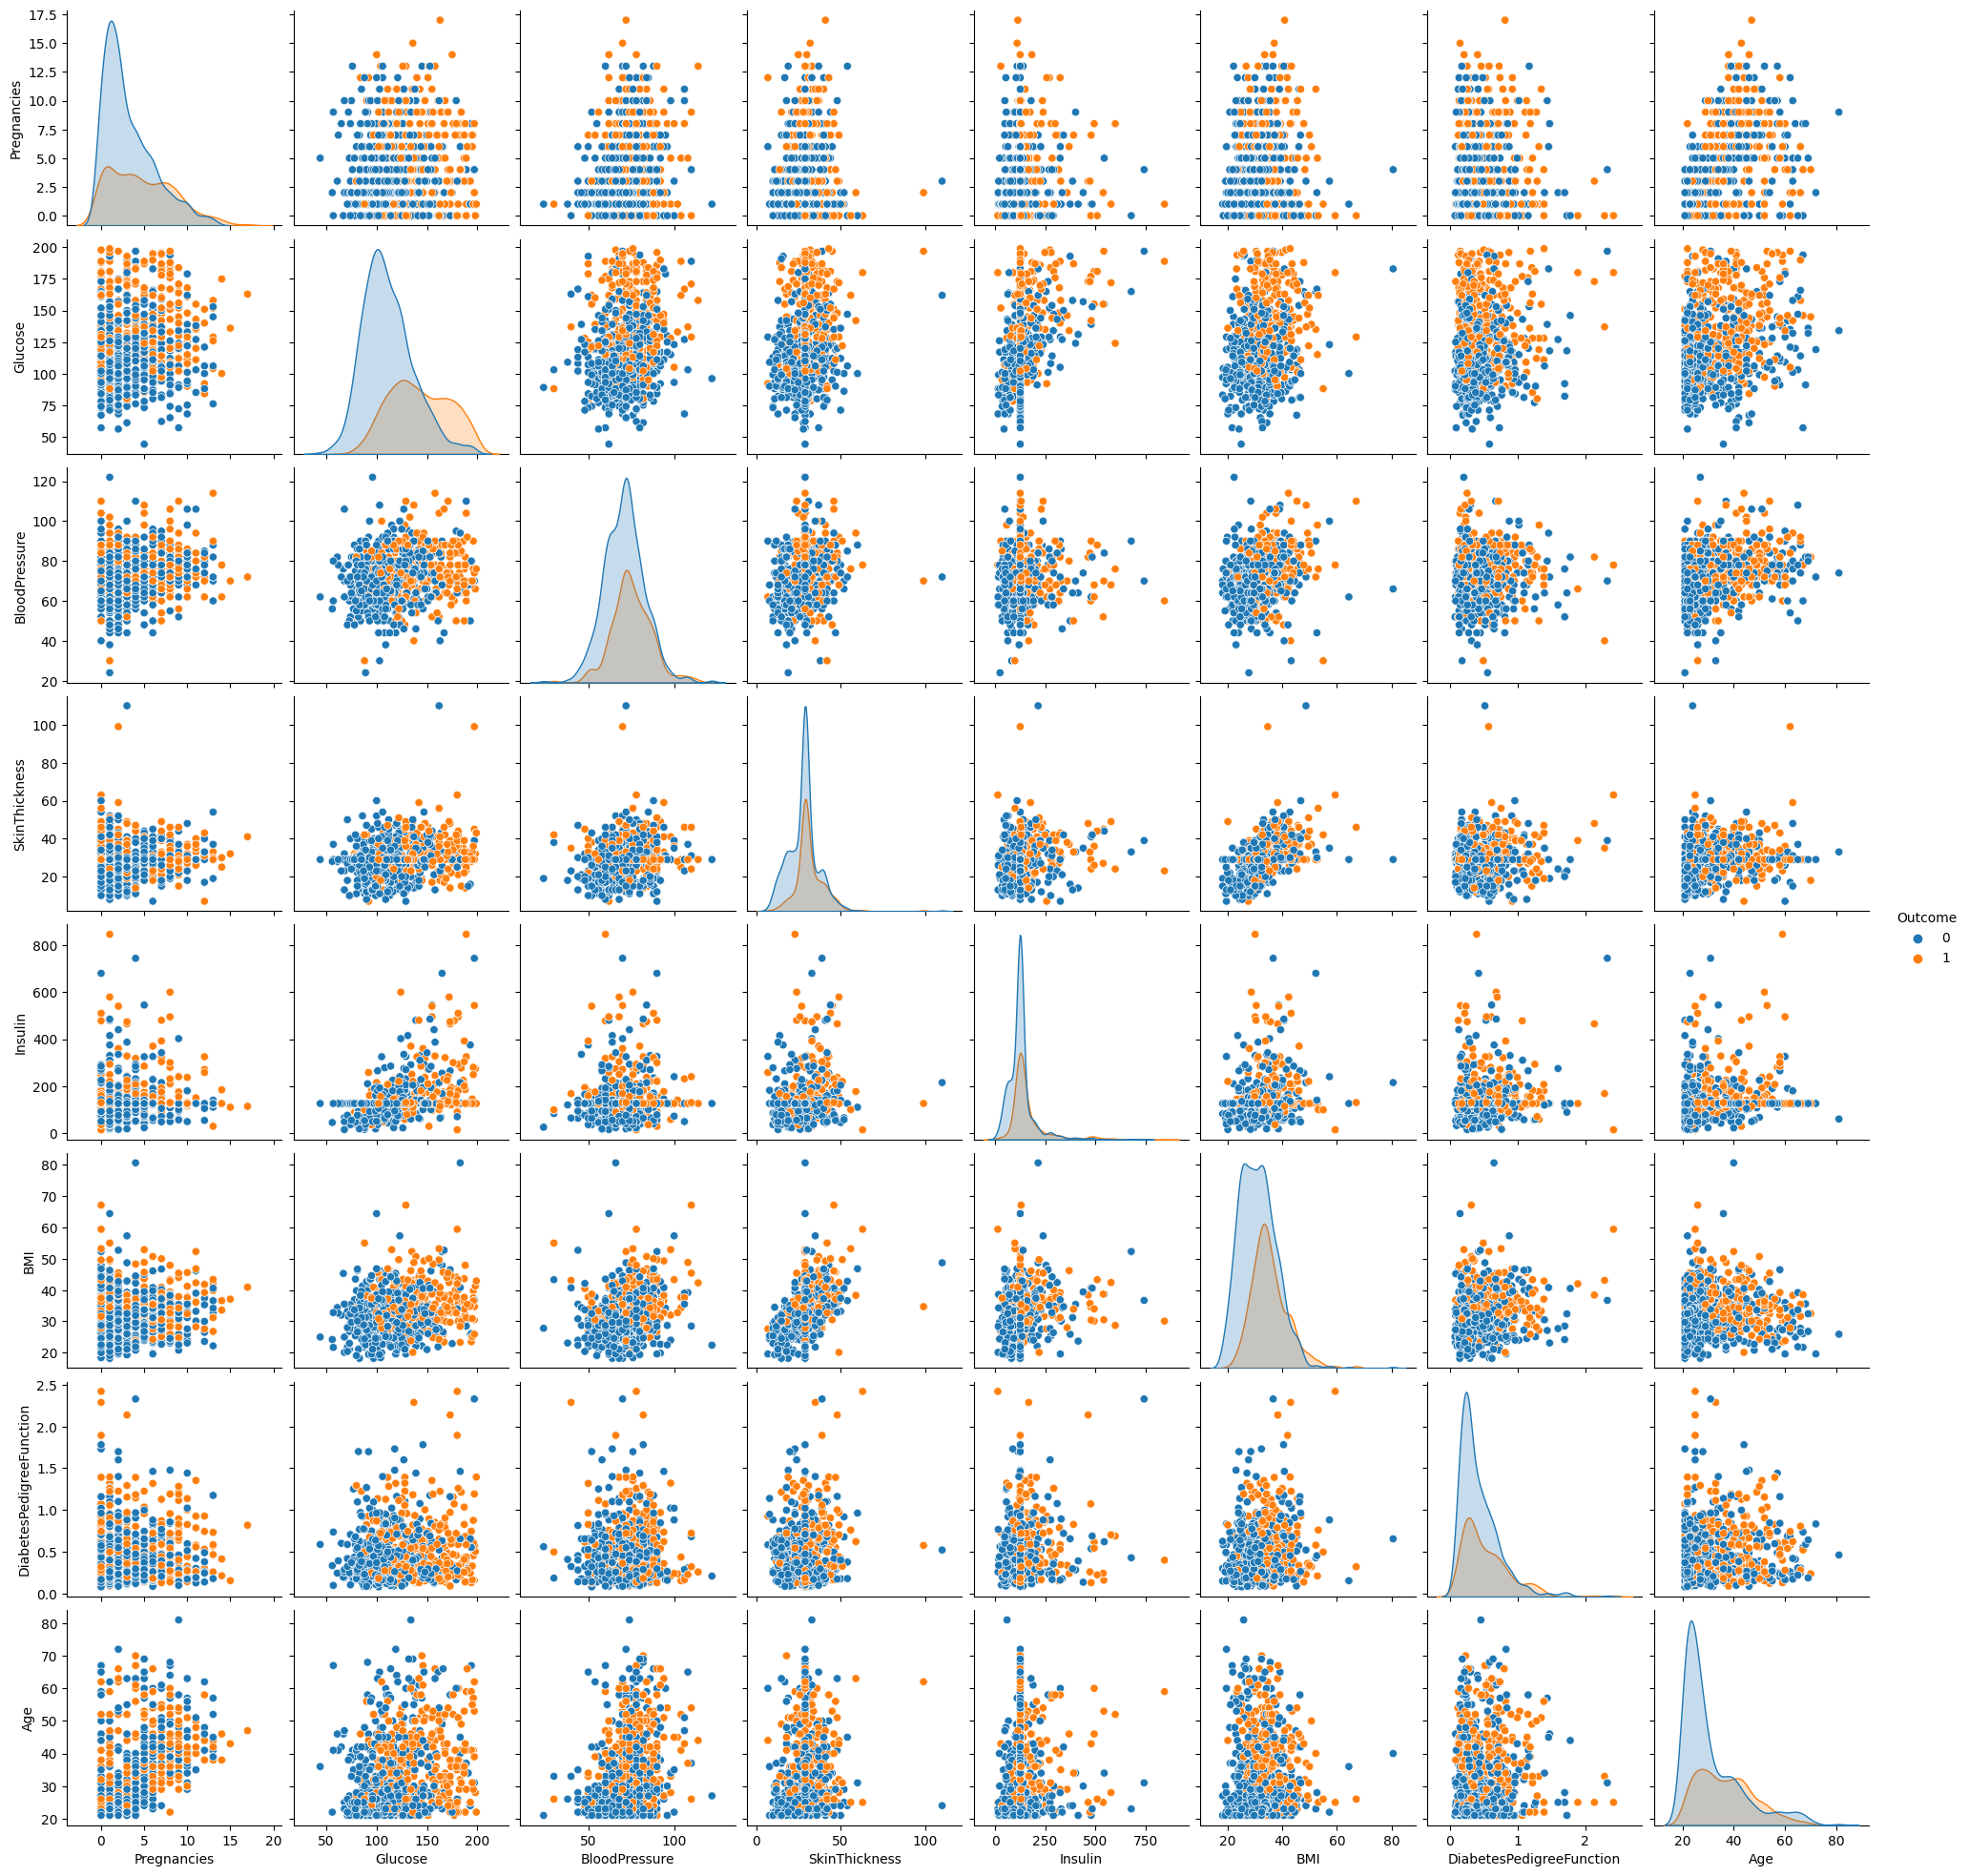

In [ ]:
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()

**3D Scatter Plot:**

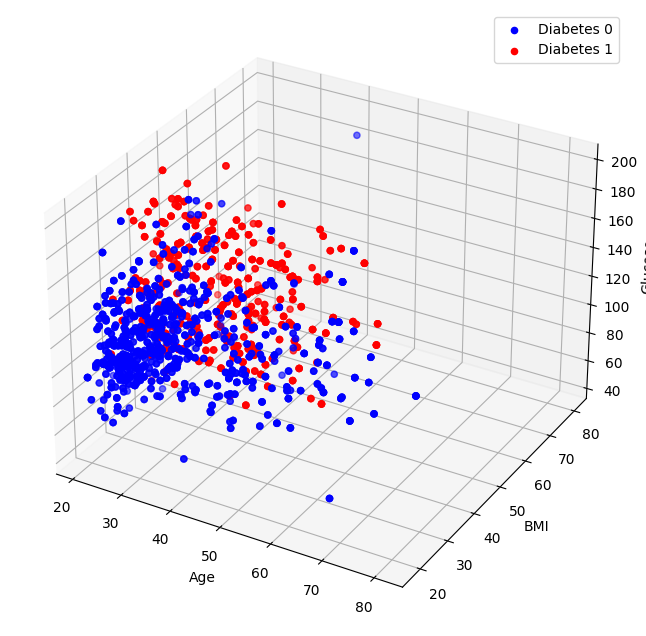

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for diabetes status (0 for No Diabetes, 1 for Diabetes)
colors = {0: 'blue', 1: 'red'}

# Scatter plot with Age on the x-axis, BMI on the y-axis, and Glucose on the z-axis
for outcome, color in colors.items():
    subset = df[df['Outcome'] == outcome]
    ax.scatter(subset['Age'], subset['BMI'], subset['Glucose'], c=color, label=f'Diabetes {outcome}')

# Set labels for each axis
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Glucose')

# Add a legend
ax.legend()

# Show the 3D scatter plot
plt.show()

**violin Plot:**

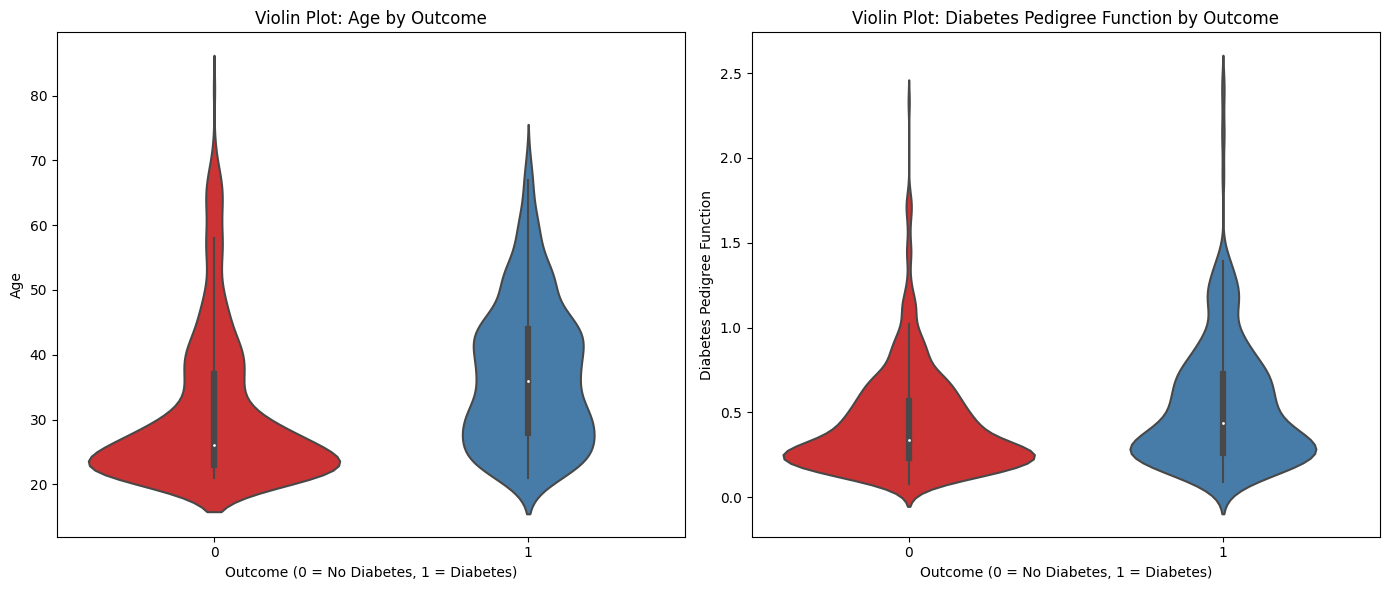

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Violin Plot 1: Age by Outcome (Diabetes vs. No Diabetes)
sns.violinplot(x='Outcome', y='Age', data=df, palette='Set1', ax=axes[0])
axes[0].set_title('Violin Plot: Age by Outcome')
axes[0].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[0].set_ylabel('Age')

# Violin Plot 2: Diabetes Pedigree Function by Outcome (Diabetes vs. No Diabetes)
sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, palette='Set1', ax=axes[1])
axes[1].set_title('Violin Plot: Diabetes Pedigree Function by Outcome')
axes[1].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[1].set_ylabel('Diabetes Pedigree Function')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

**Box Plot:**

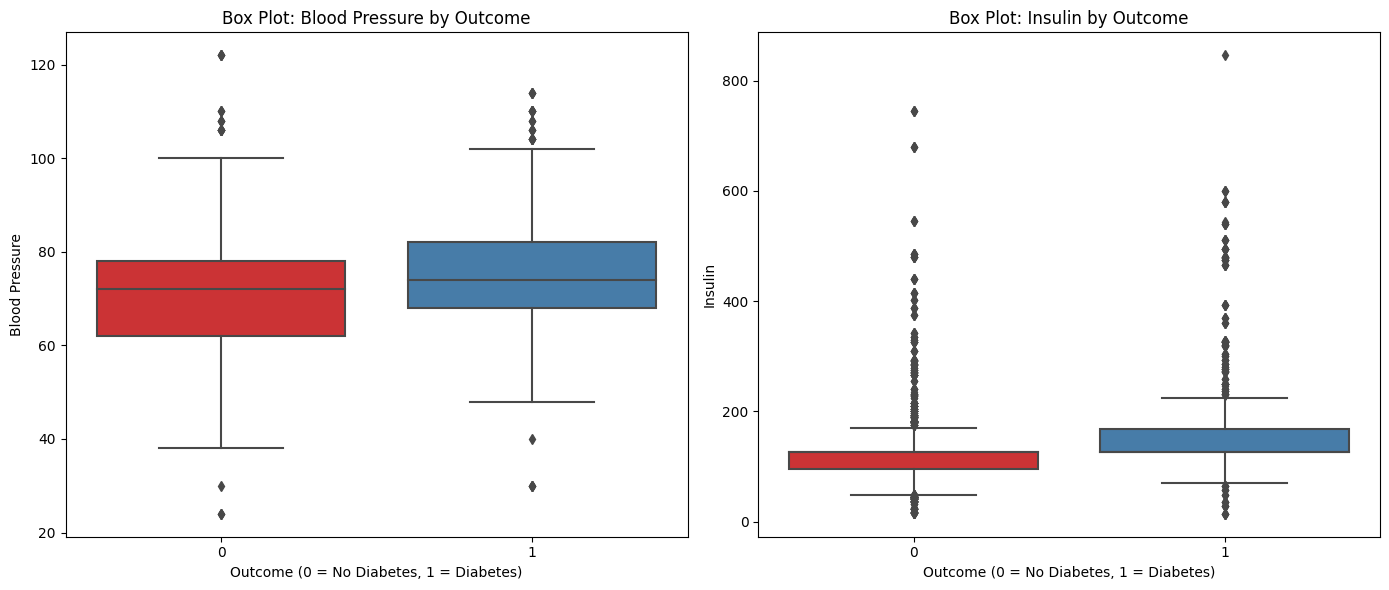

In [ ]:
# Create subplots with two box plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box Plot 1: Blood Pressure by Outcome (Diabetes vs. No Diabetes)
sns.boxplot(x='Outcome', y='BloodPressure', data=df, palette='Set1', ax=axes[0])
axes[0].set_title('Box Plot: Blood Pressure by Outcome')
axes[0].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[0].set_ylabel('Blood Pressure')

# Box Plot 2: Insulin by Outcome (Diabetes vs. No Diabetes)
sns.boxplot(x='Outcome', y='Insulin', data=df, palette='Set1', ax=axes[1])
axes[1].set_title('Box Plot: Insulin by Outcome')
axes[1].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[1].set_ylabel('Insulin')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

In [ ]:
#Build the Logistic Regression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train, y_train);

#Evaluating the model
log_reg = log_reg.score(x_test, y_test)
log_reg

0.779783393501805

In [ ]:
#Bulid an Model
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train);

#Evaluating the Model
KNN = KNN.score(x_test,y_test)
KNN

0.8610108303249098

In [ ]:
#Build the Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train);

#Evaluting the model
RFC = RFC.score(x_test,y_test)
RFC

0.9693140794223827

In [ ]:
# Build the Support Vector Machine (SVM) model
SVM = SVC()
SVM.fit(x_train, y_train)

# Evaluate the model and store the evaluation score
SVM = SVM.score(x_test, y_test)
SVM

0.8212996389891697

In [ ]:
# Build the Gradient Boosting Classifier (GBC) model
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)

# Evaluate the model and store the evaluation score
GBC = GBC.score(x_test, y_test)
GBC

0.8808664259927798

In [ ]:
# Create a Gaussian Naive Bayes classifier
GNB = GaussianNB()
GNB.fit(x_train, y_train)

# Evaluate the classifier on your test data (x_test and y_test)
GNB = GNB.score(x_test, y_test)
GNB

0.776173285198556

In [ ]:
# Create a DecisionTreeClassifier instance
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

# Evaluate the classifier on your test data (x_test and y_test)
DT = DT.score(x_test, y_test)
DT

0.9675090252707581

In [ ]:
# Create a XGBoost instance
XGB = XGBClassifier()
XGB.fit(x_train, y_train)

# Evaluate the classifier on your test data (x_test and y_test)
XGB = XGB.score(x_test,y_test)
XGB

0.9765342960288809

In [ ]:
model_compare = pd.DataFrame({"Logistic Regression": log_reg,
                              "KNN":KNN,
                              "Decision Tree": DT,
                              "SVM": SVM,
                              "G.Boosting": GBC,
                              "R.Forest": RFC,
                              "Navie Bayes": GNB,
                              "XGBoosting": XGB,
                              },index=["accuracy"])

In [ ]:
model_compare

Logistic Regression       KNN  Decision Tree     SVM  G.Boosting  \
accuracy             0.779783  0.861011       0.967509  0.8213    0.880866   

          R.Forest  Navie Bayes  XGBoosting  
accuracy  0.969314     0.776173    0.976534

**Decision Tree**

In [ ]:
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train, y_train)
y_pred_train = DT_model.predict(x_train)
print("-----Model Evaluation on Train Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))

-----Model Evaluation on Train Data-----

Confusion Matrix:
 [[1254    0]
 [   0  683]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1254
           1       1.00      1.00      1.00       683

    accuracy                           1.00      1937
   macro avg       1.00      1.00      1.00      1937
weighted avg       1.00      1.00      1.00      1937



In [ ]:
y_pred = DT_model.predict(x_test)
print("-----Model Evaluation on Test Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))

-----Model Evaluation on Test Data-----

Confusion Matrix:
 [[361  13]
 [  6 174]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       374
           1       0.93      0.97      0.95       180

    accuracy                           0.97       554
   macro avg       0.96      0.97      0.96       554
weighted avg       0.97      0.97      0.97       554



In [ ]:
print(f"Accuracy on Train Data:{accuracy_score(y_train,y_pred_train):.4f}")
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred):.4f}")

Accuracy on Train Data:1.0000
Accuracy on Test Data:0.9657


**Hyperparameter Tunning**

**1. RandomizedSearch CV**

In [ ]:
# Define the hyperparameter grid for random search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(np.arange(1, 21)),
    'min_samples_split': list(np.arange(2, 11)),
    'min_samples_leaf': list(np.arange(1, 11)),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [42]  # You can change this if you want a different random state
}

# Create a RandomizedSearchCV object
rs_DT = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to your data
rs_DT.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'random_state': [42],
                                        'splitter': ['best', 'random']})

In [ ]:
rs_DT.score(x_test, y_test)

0.9693140794223827

**2. GridSearch CV**

In [ ]:
# Define the parameter grid you want to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
gs_DT = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
gs_DT.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
DT = gs_DT.score(x_test, y_test)
DT

0.9693140794223827

**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier model
decision_tree_model = DecisionTreeClassifier()

# Specify the number of folds for cross-validation
num_folds = 5  # You can change the number of folds as needed

# Create a cross-validation iterator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation using the validation set
cross_val_scores = cross_val_score(decision_tree_model, x_val, y_val, cv=kf)

# The cross_val_scores will contain the evaluation results for each fold
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.67857143 0.73214286 0.65454545 0.72727273 0.70909091]
Mean Cross-Validation Score: 0.7003246753246752


**Random Forest**

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)
y_pred_train = RF_model.predict(x_train)
print("-----Model Evaluation on Train Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))

-----Model Evaluation on Train Data-----

Confusion Matrix:
 [[1254    0]
 [   0  683]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1254
           1       1.00      1.00      1.00       683

    accuracy                           1.00      1937
   macro avg       1.00      1.00      1.00      1937
weighted avg       1.00      1.00      1.00      1937



In [ ]:
y_pred = RF_model.predict(x_test)
print("-----Model Evaluation on Test Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))

-----Model Evaluation on Test Data-----

Confusion Matrix:
 [[365   9]
 [  6 174]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       374
           1       0.95      0.97      0.96       180

    accuracy                           0.97       554
   macro avg       0.97      0.97      0.97       554
weighted avg       0.97      0.97      0.97       554



In [ ]:
print(f"Accuracy on Train Data:{accuracy_score(y_train,y_pred_train):.4f}")
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred):.4f}")

Accuracy on Train Data:1.0000
Accuracy on Test Data:0.9729


**Hyperparameter Tunning on Random Forest **

**1. GridSearch CV**

In [ ]:
# Define a smaller hyperparameter grid for grid search
param_grid = {
    'n_estimators': [100, 300],  # A smaller set of options for n_estimators
    'max_depth': [None, 10],    # A smaller set of options for max_depth
    'min_samples_split': [2, 5],  # A smaller set of options for min_samples_split
}

# Create a GridSearchCV object
gs_RF = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to your data
gs_RF.fit(x_train, y_train)  # Replace with your training data

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 300]})

In [ ]:
gs_RF.score(x_test, y_test)

0.9693140794223827

**2. RandomizedSearch CV**

In [ ]:
# Define a smaller hyperparameter grid to search
param_dist = {
    'n_estimators': [100, 300, 500],  # Reduced options for n_estimators
    'max_features': ['auto', 'sqrt'],  # Fewer options for max_features
    'max_depth': [None, 10, 20],  # Fewer options for max_depth
    'min_samples_split': [2, 5],  # Reduced options for min_samples_split
    'min_samples_leaf': [1, 2],  # Reduced options for min_samples_leaf
    'bootstrap': [True, False]  # Fewer options for bootstrap
}
# Create a RandomizedSearchCV object with fewer iterations
rs_RF = RandomizedSearchCV(
    RandomForestClassifier(), param_distributions=param_dist, n_iter=20, scoring='accuracy', n_jobs=-1, cv=5, verbose=2, random_state=42
)

# Fit the RandomizedSearchCV to your data
rs_RF.fit(x_train, y_train) # Replace X_train and y_train with your training data

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
RF = rs_RF.score(x_test, y_test)
RF

0.9693140794223827

**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier model
random_forest_model = RandomForestClassifier()

# Specify the number of folds for cross-validation
num_folds = 5  # You can change the number of folds as needed

# Create a cross-validation iterator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation using the validation set
cross_val_scores = cross_val_score(random_forest_model, x_val, y_val, cv=kf)

# The cross_val_scores will contain the evaluation results for each fold
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.73214286 0.83928571 0.81818182 0.87272727 0.69090909]
Mean Cross-Validation Score: 0.7906493506493506


**Cross Validation**

In [ ]:
# Create a Random Forest classifier
import joblib
rf_classifier = RandomForestClassifier(n_estimators=100)  # You can set the number of trees

# Perform k-fold cross-validation (e.g., 5-fold cross-validation)
k = 5
scores_RF_Train = cross_val_score(rf_classifier, x_train, y_train, cv=k, scoring='accuracy')  # x and y are your feature and target data

# Print the cross-validation scores
print("Cross-Validation Scores:", scores_RF_Train)
print("Mean Train Accuracy:", scores_RF_Train.mean())

k = 5
scores_RF_Test = cross_val_score(rf_classifier, x_test, y_test, cv=k, scoring='accuracy')  # x and y are your feature and target data
# Print the cross-validation scores
print("Cross-Validation Scores:", scores_RF_Test)
print("Mean Test Accuracy:", scores_RF_Test.mean())
joblib.dump(scores_RF_Test, '/content/drive/MyDrive/Colab Notebooks/diabetes_rf_model.pkl')
print("Model saved as 'diabetes_rf_model.pkl'")

Cross-Validation Scores: [0.9742268  0.96907216 0.96899225 0.96899225 0.98449612]
Mean Train Accuracy: 0.9731559178454408
Cross-Validation Scores: [0.78378378 0.81981982 0.89189189 0.82882883 0.87272727]
Mean Test Accuracy: 0.8394103194103193
Model saved as 'diabetes_rf_model.pkl'


**XG Boosting**

In [ ]:
XGB_model = XGBClassifier()
XGB_model.fit(x_train, y_train)
y_pred_train = XGB_model.predict(x_train)
print("-----Model Evaluation on Train Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))

-----Model Evaluation on Train Data-----

Confusion Matrix:
 [[1254    0]
 [   0  683]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1254
           1       1.00      1.00      1.00       683

    accuracy                           1.00      1937
   macro avg       1.00      1.00      1.00      1937
weighted avg       1.00      1.00      1.00      1937



In [ ]:
y_pred = XGB_model.predict(x_test)
print("-----Model Evaluation on Test Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))

-----Model Evaluation on Test Data-----

Confusion Matrix:
 [[367   7]
 [  6 174]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       374
           1       0.96      0.97      0.96       180

    accuracy                           0.98       554
   macro avg       0.97      0.97      0.97       554
weighted avg       0.98      0.98      0.98       554



In [ ]:
print(f"Accuracy on Train Data:{accuracy_score(y_train,y_pred_train):.4f}")
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred):.4f}")

Accuracy on Train Data:1.0000
Accuracy on Test Data:0.9765


**Hyperparameter Tunning on XG Boosting**






***1. Using RandomizedSearchCV***

In [ ]:
# Define the hyperparameter grid to search over
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees
    'max_depth': randint(3, 10),  # Maximum depth of a tree
    'learning_rate': uniform(0.01, 0.3),  # Learning rate
    'subsample': uniform(0.6, 0.4),  # Subsample ratio of the training data
    'colsample_bytree': uniform(0.6, 0.4),  # Subsample ratio of columns when constructing each tree
    'gamma': uniform(0, 1)  # Minimum loss reduction required to make a further partition on a leaf node
}

# Create the RandomizedSearchCV object
rs_XGB = RandomizedSearchCV(XGBClassifier(), param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV to the training data
rs_XGB.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7dde181a7700>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dde18c83340>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dde181a6050>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7dde181a72b0>},
                   random_state=42)

In [ ]:
rs_XGB.score(x_test, y_test)

0.9693140794223827

***2.   Using GridSearchCV***

In [ ]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training data
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition on a leaf node
}

# Create the GridSearchCV object
gs_XGB = GridSearchCV(XGBClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
gs_XGB.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]})

In [ ]:
XGB = gs_XGB.score(x_test, y_test)
XGB


0.9729241877256317

In [ ]:
model_compare = pd.DataFrame({"Decision Tree": DT,
                              "R.Forest": RF,
                              "XGBoosting": XGB,
                              },index=["accuracy"])

In [ ]:
model_compare

Decision Tree  R.Forest  XGBoosting
accuracy       0.969314  0.969314    0.972924

In [ ]:
y_preds = rs_RF.predict(x_test)
y_preds

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
np.array(y_test)

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,

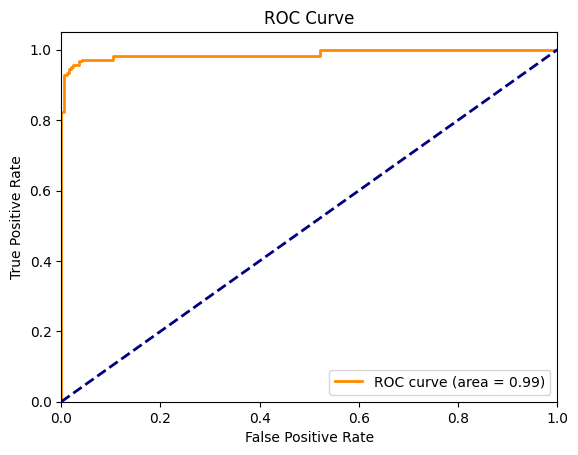

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


# Get the predicted probabilities for the positive class
y_pred_prob = rs_RF.predict_proba(x_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[365   9]
 [  8 172]]


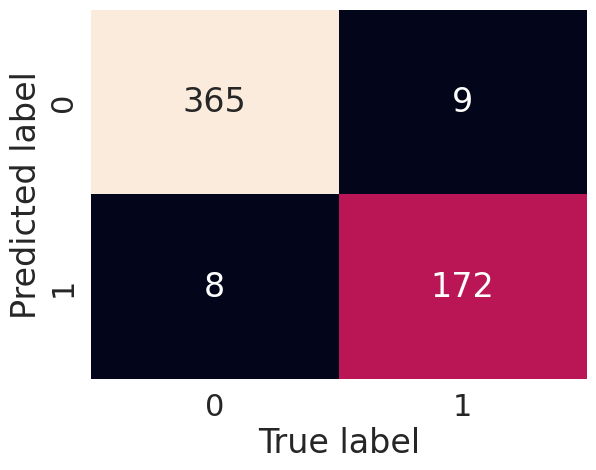

In [ ]:
sns.set(font_scale=2)
# Assuming you have 'y_test' and 'y_preds' defined earlier
conf_matrix = confusion_matrix(y_test, y_preds)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label")

plt.show()  # If you want to display the plot

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       374
           1       0.95      0.96      0.95       180

    accuracy                           0.97       554
   macro avg       0.96      0.97      0.97       554
weighted avg       0.97      0.97      0.97       554



In [ ]:
rs_RF.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

**Metrics**

In [ ]:
# Specify the number of folds for cross-validation
num_folds = 5  # You can change the number of folds as needed

# Create a cross-validation iterator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)



# Perform cross-validation using the validation set
cv_acc = cross_val_score(RandomForestClassifier(), x_val, y_val, cv=kf)

cv_acc

array([0.73214286, 0.85714286, 0.81818182, 0.87272727, 0.67272727])

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7905844155844155

In [ ]:
cv_precision = cross_val_score(RandomForestClassifier(),
                               x,
                               y,
                               cv=10,
                               scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.9863736263736265

In [ ]:
cv_recall = cross_val_score(RandomForestClassifier(),
                            x,
                            y,
                            cv=10,
                            scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9895504385964913

In [ ]:
cv_f1 = cross_val_score(RandomForestClassifier(),
                        x,
                        y,
                        cv=10,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.9896840747904578

In [ ]:
from sklearn.metrics import make_scorer, cohen_kappa_score

kappa_scorer = make_scorer(cohen_kappa_score)

cv_kappa = cross_val_score(RandomForestClassifier(),
                                                  x,
                                                  y,
                                                  cv=10,
                                                  scoring=kappa_scorer)
cv_kappa = np.mean(cv_kappa)

cv_kappa

0.9825986837842315

In [ ]:
from sklearn.metrics import balanced_accuracy_score

cv_balanced_accuracy = cross_val_score(RandomForestClassifier(),
                                                              x,
                                                              y,
                                                              cv=10,
                                                              scoring=make_scorer(balanced_accuracy_score))
cv_balanced_accuracy = np.mean(cv_balanced_accuracy)

cv_balanced_accuracy

0.9914341317728022

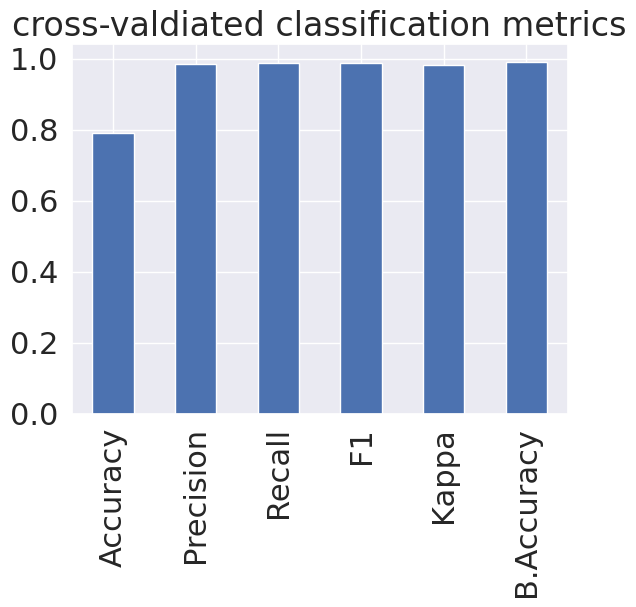

In [ ]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1,
                           "Kappa": cv_kappa,
                           "B.Accuracy": cv_balanced_accuracy},
                          index=[0])

cv_metrics.T.plot.bar(title="cross-valdiated classification metrics",
                      legend=False);

**Loading & Saving the Model:**

In [ ]:
import pickle

pickle.dump(rs_RF, open("Diabetes.pkl", "wb"))

In [ ]:
loaded_model = pickle.load(open("Diabetes.pkl", "rb"))
loaded_model.predict(x_test)
loaded_model.score(x_test, y_test)

0.9693140794223827

**Predicting the Outcome Using New Data:**

In [ ]:
Pregnancies = input()
Glucose = input()
BloodPressure = input()
SkinThickness = input()
Insulin = input()
BMI = input()
DiabetesPedigreeFunction = input()
Age = input()

In [ ]:
row_df = pd.DataFrame([pd.Series([Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age])])

In [ ]:
row_df

In [ ]:
prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you having Diabetes is {prob}")

In [ ]:

loaded_model.predict(row_df)[0]


In [ ]:
# Make prediction
predictions = loaded_model.predict(row_df.values.reshape(1, -1))

if predictions[0] == 1:
    print("The Person has Diabetes.")
else:
    print("The Person does not have Diabetes.")
